In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder 

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('./train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
# Check for missing data
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
missing_data_percentage = (missing_data / len(df)) * 100

# Display missing data details
missing_data_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_data_percentage})
missing_data_df

,Missing Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


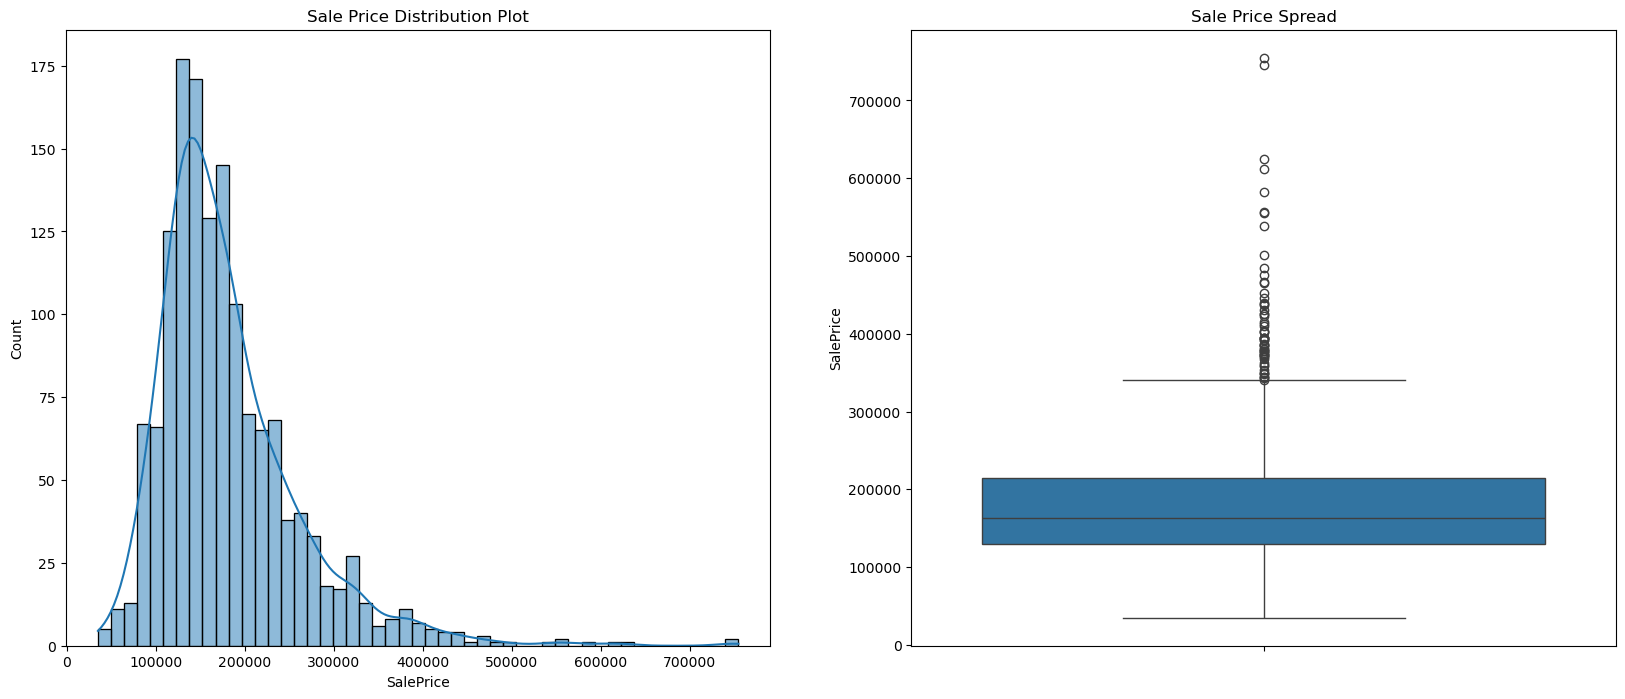

In [5]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Sale Price Distribution Plot')
sns.histplot(df.SalePrice, kde=True)

plt.subplot(1,2,2)
plt.title('Sale Price Spread')
sns.boxplot(y=df.SalePrice)

plt.show()

In [6]:
print(df.SalePrice.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
85%      250000.000000
90%      278000.000000
100%     755000.000000
max      755000.000000
Name: SalePrice, dtype: float64


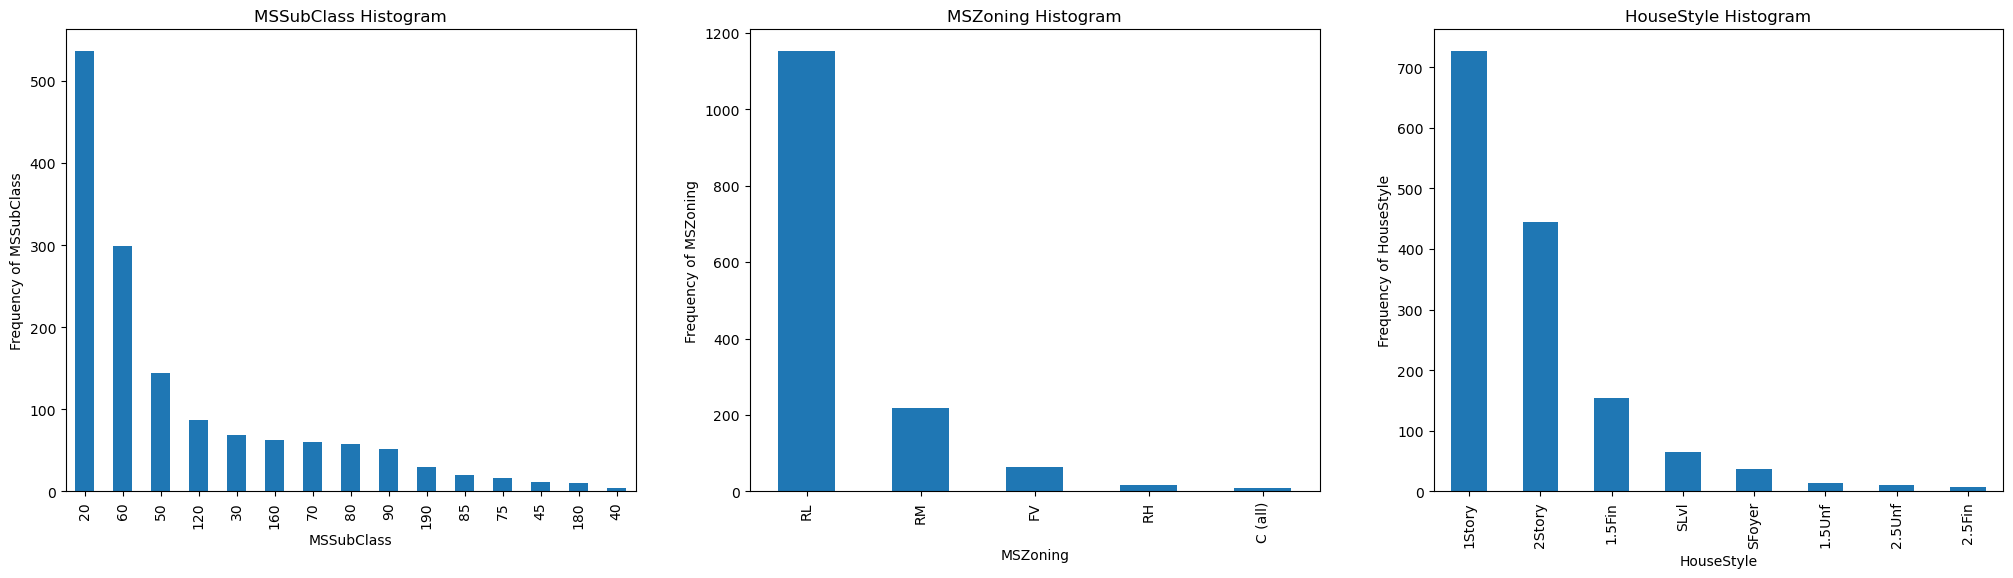

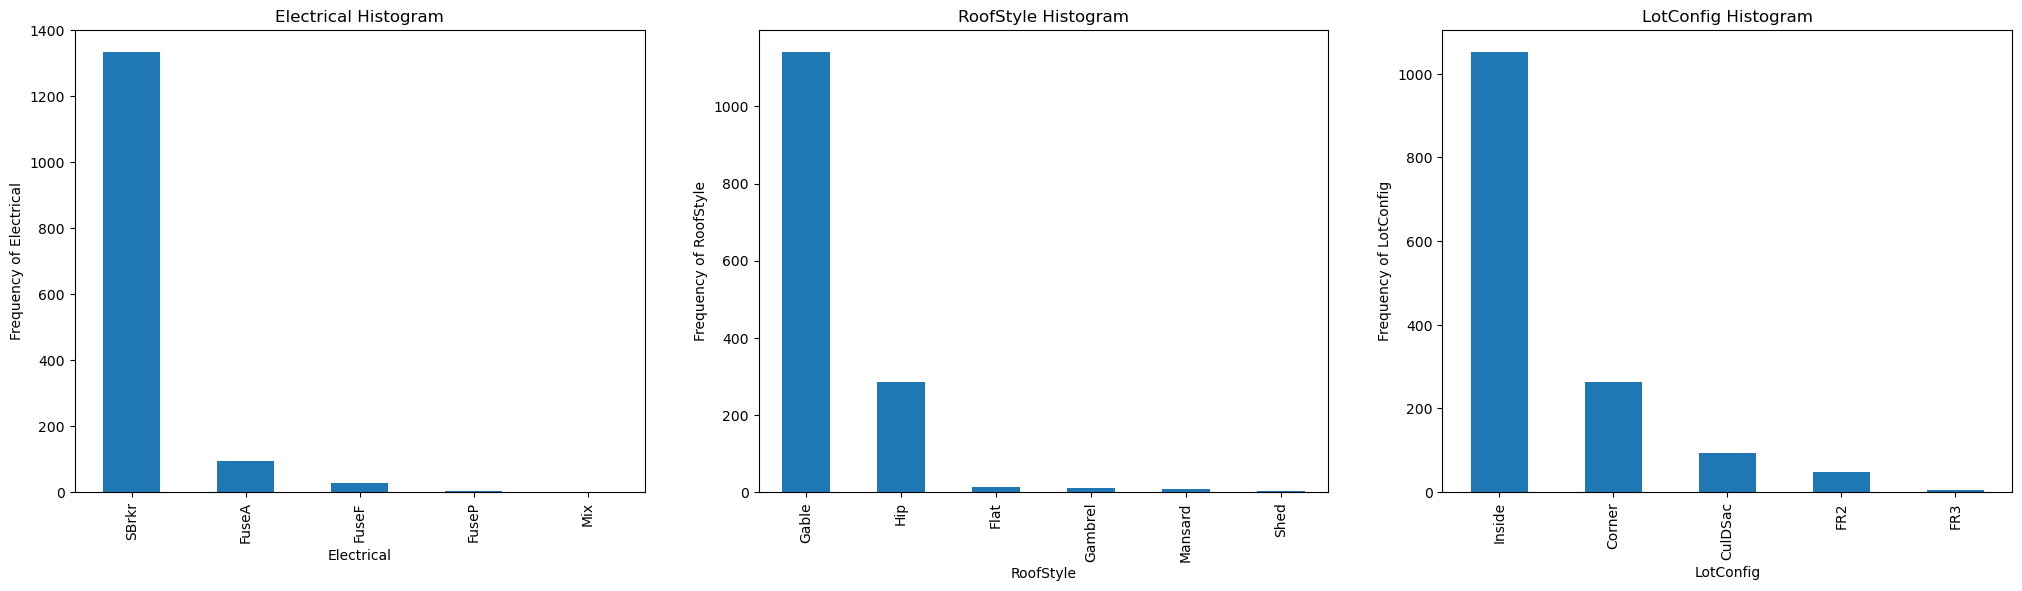

In [7]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.MSSubClass.value_counts().plot(kind='bar')
plt.title('MSSubClass Histogram')
plt1.set(xlabel = 'MSSubClass', ylabel='Frequency of MSSubClass')

plt.subplot(1,3,2)
plt1 = df.MSZoning.value_counts().plot(kind='bar')
plt.title('MSZoning Histogram')
plt1.set(xlabel = 'MSZoning', ylabel='Frequency of MSZoning')

plt.subplot(1,3,3)
plt1 = df.HouseStyle.value_counts().plot(kind='bar')
plt.title('HouseStyle Histogram')
plt1.set(xlabel = 'HouseStyle', ylabel='Frequency of HouseStyle')

plt.show()


plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.Electrical.value_counts().plot(kind='bar')
plt.title('Electrical Histogram')
plt1.set(xlabel = 'Electrical', ylabel='Frequency of Electrical')

plt.subplot(1,3,2)
plt1 = df.RoofStyle.value_counts().plot(kind='bar')
plt.title('RoofStyle Histogram')
plt1.set(xlabel = 'RoofStyle', ylabel='Frequency of RoofStyle')

plt.subplot(1,3,3)
plt1 = df.LotConfig.value_counts().plot(kind='bar')
plt.title('LotConfig Histogram')
plt1.set(xlabel = 'LotConfig', ylabel='Frequency of LotConfig')

plt.show()



In [8]:
# def scatter(x,fig):
#     plt.subplot(20,2,fig)
#     plt.scatter(df[x],df['SalePrice'])
#     plt.title(x+' vs Price')
#     plt.ylabel('Price')
#     plt.xlabel(x)

# plt.figure(figsize=(10,80))

# i = 1

# exclusions = [
#     'Id', 'MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
#     'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
#     'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
#     'ExterCond', 'CentralAir', 'SalePrice', 'BsmtFullBath', 'MoSold', 'YrSold', 'SaleCondition', 'MiscVal'
# ]

# for column in df.columns:
#     try:
#         if column in exclusions:
#             continue
#         scatter(column, i)
#         i += 1
#     except Exception as e:
#         print(f'Column {column} error: {e}')

# plt.tight_layout()

In [9]:
# Adding one more variables
df['BuiltToSale'] = df['YrSold'] - df['YearBuilt']
df.columns.size

82

['Id' 'MSSubClass'] 2


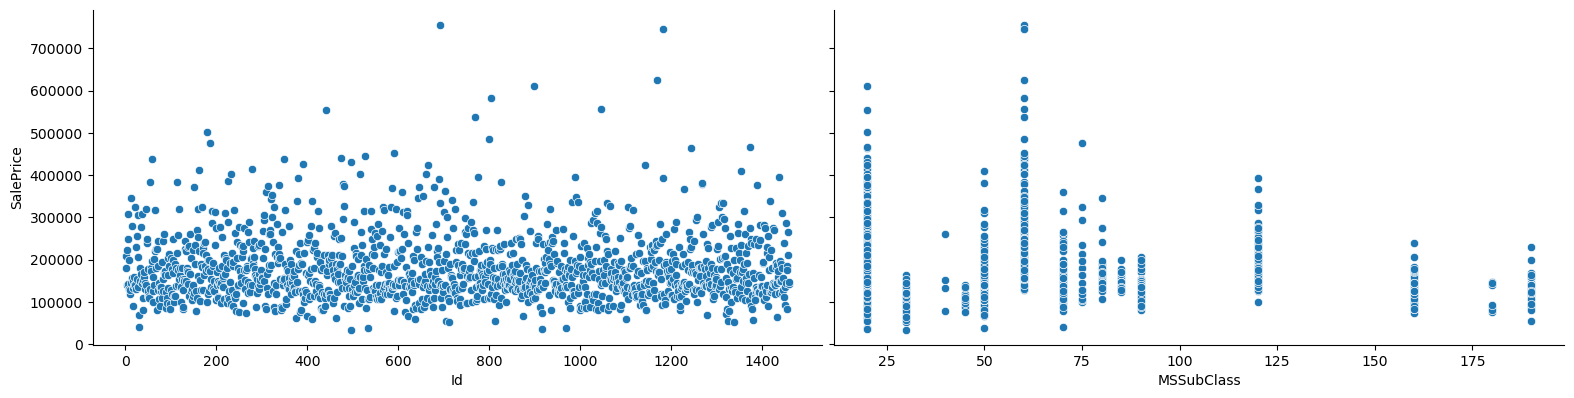

['MSZoning' 'LotFrontage'] 4


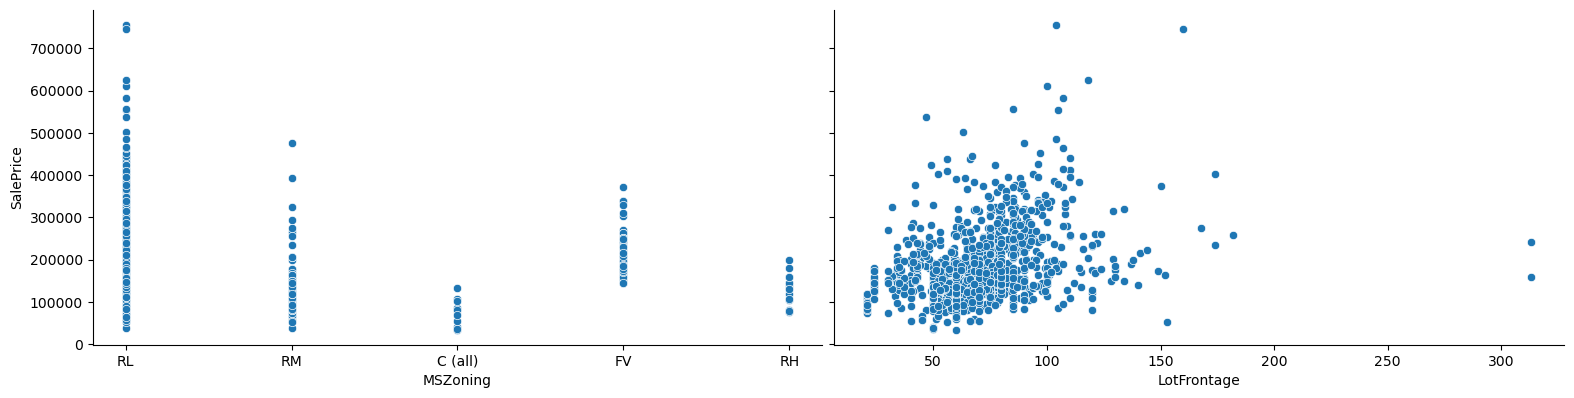

['LotArea' 'Street'] 6


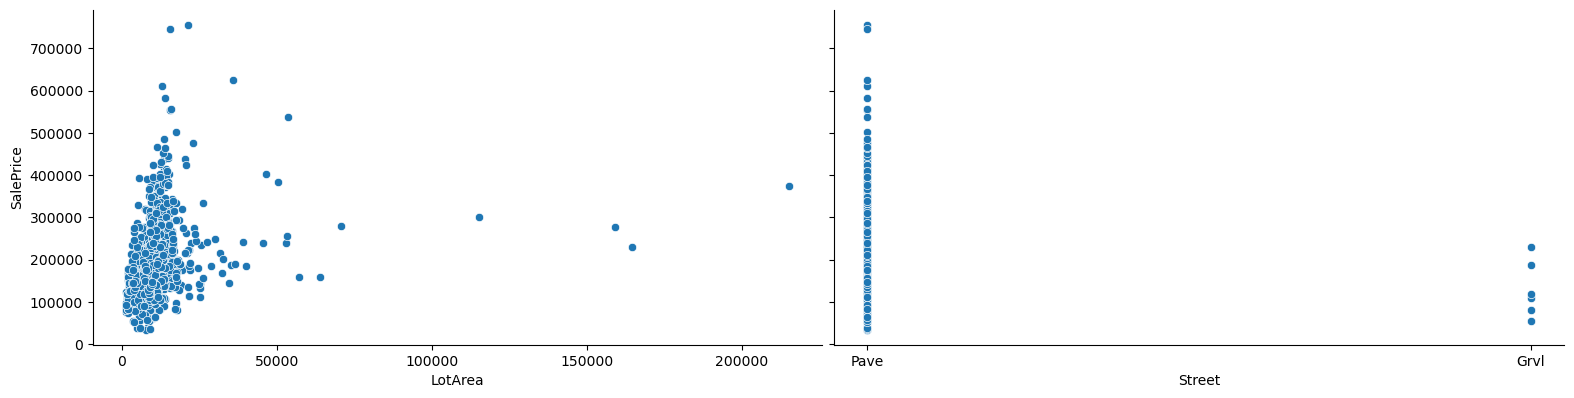

['Alley' 'LotShape'] 8


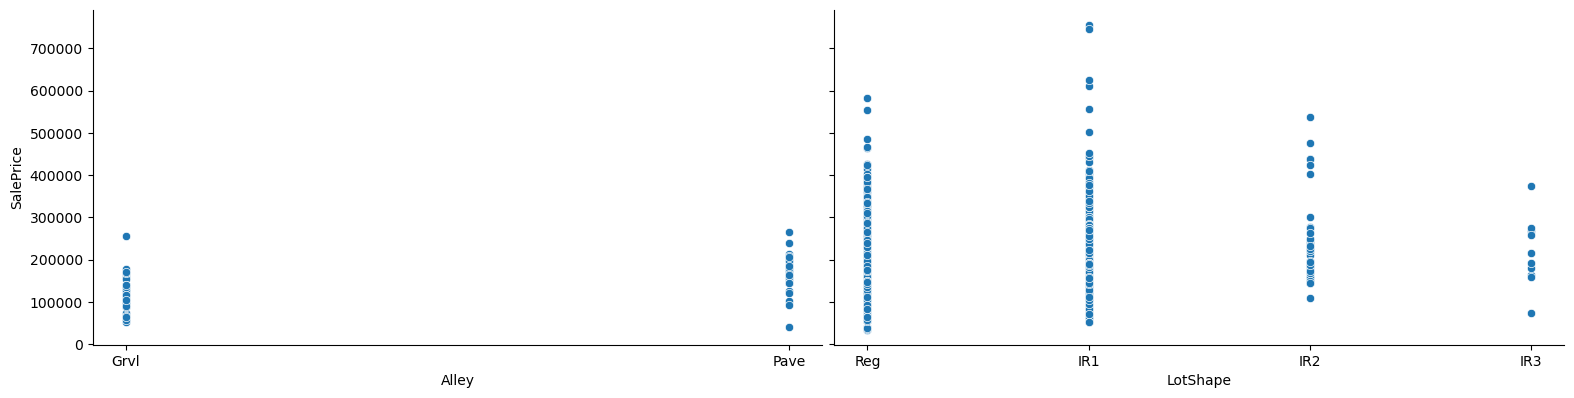

['LandContour' 'Utilities'] 10


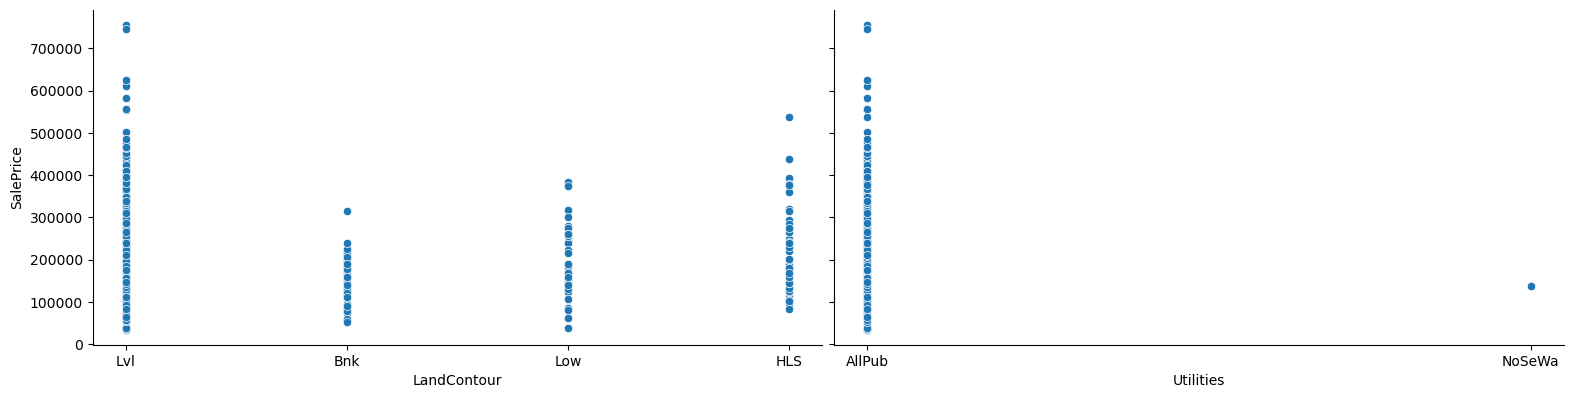

['LotConfig' 'LandSlope'] 12


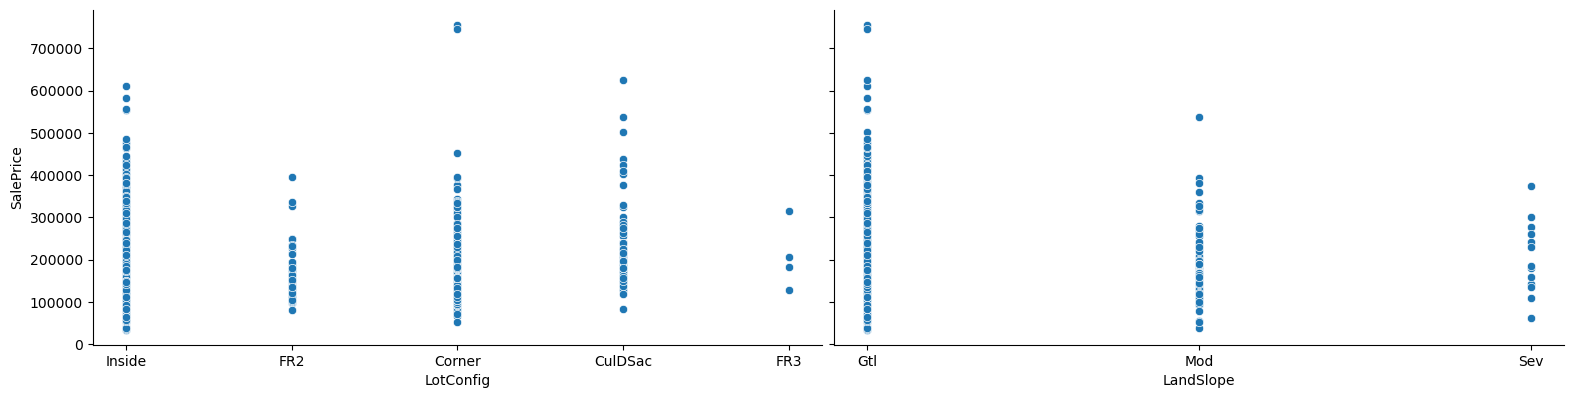

['Neighborhood' 'Condition1'] 14


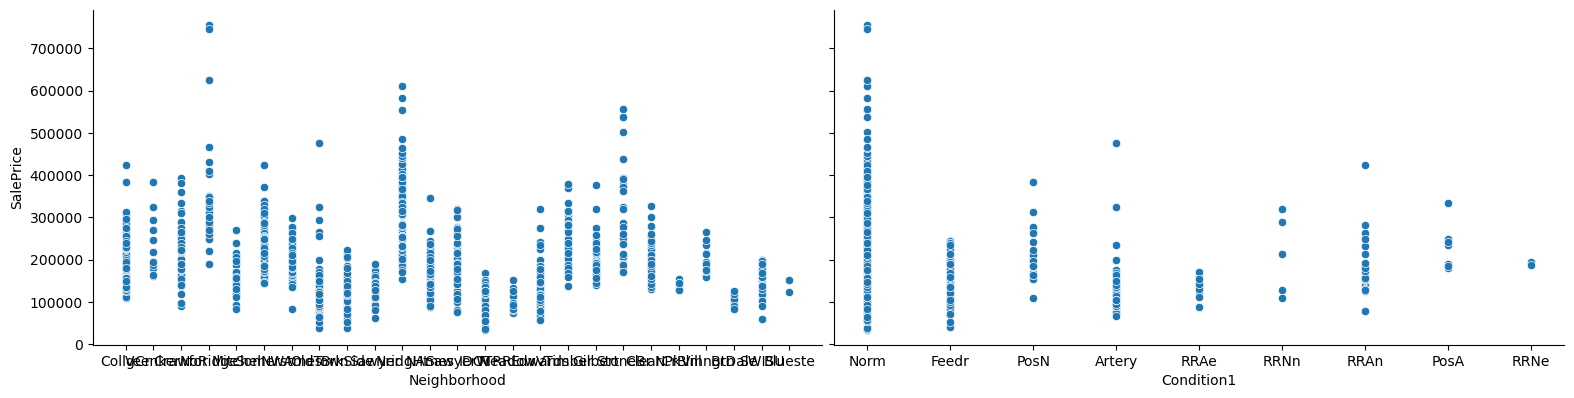

['Condition2' 'BldgType'] 16


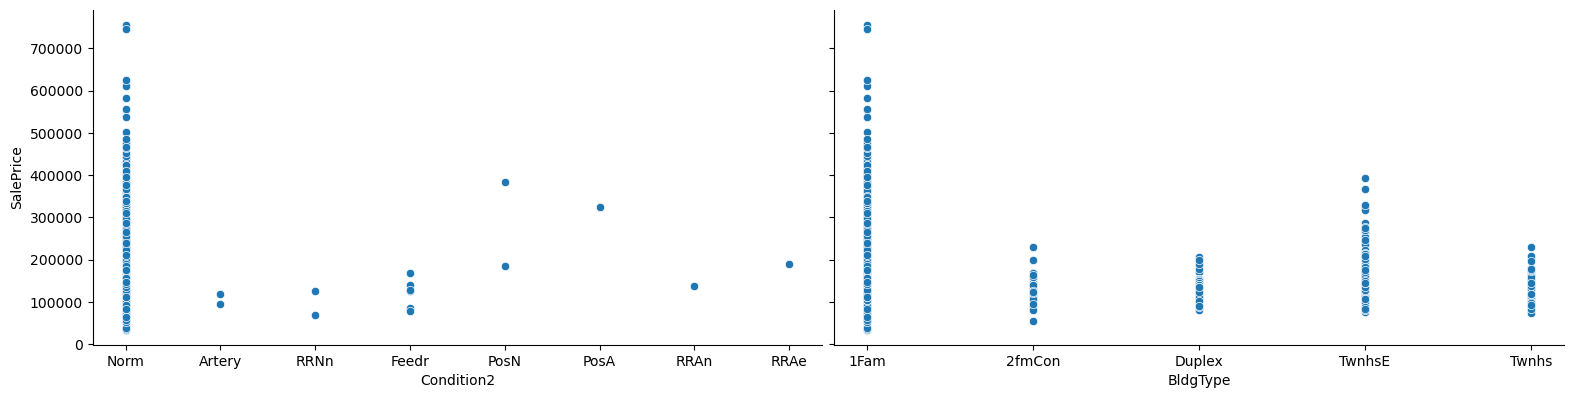

['HouseStyle' 'OverallQual'] 18


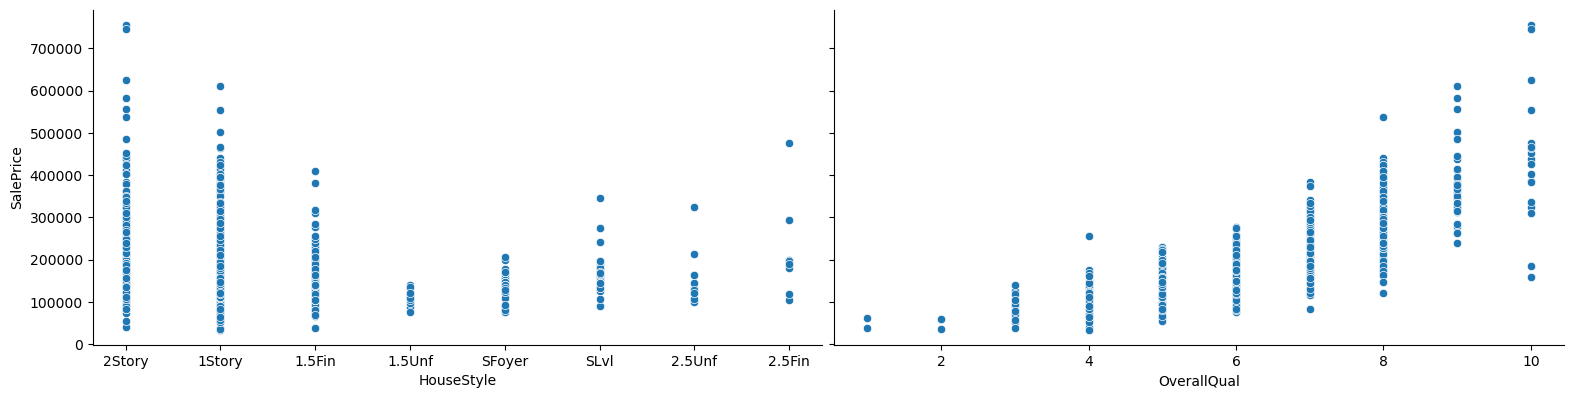

['OverallCond' 'YearBuilt'] 20


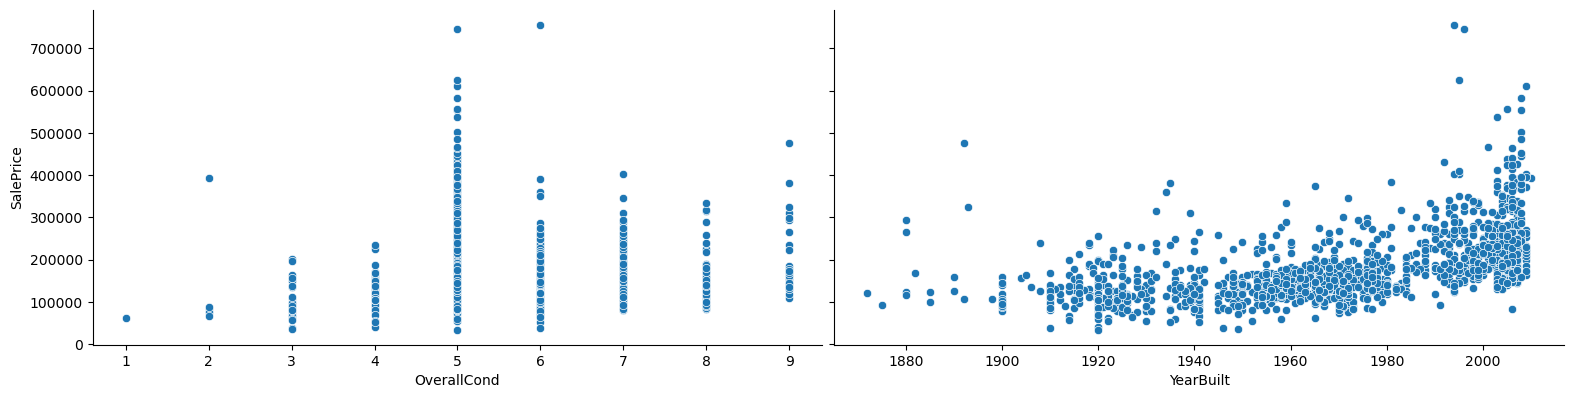

['YearRemodAdd' 'RoofStyle'] 22


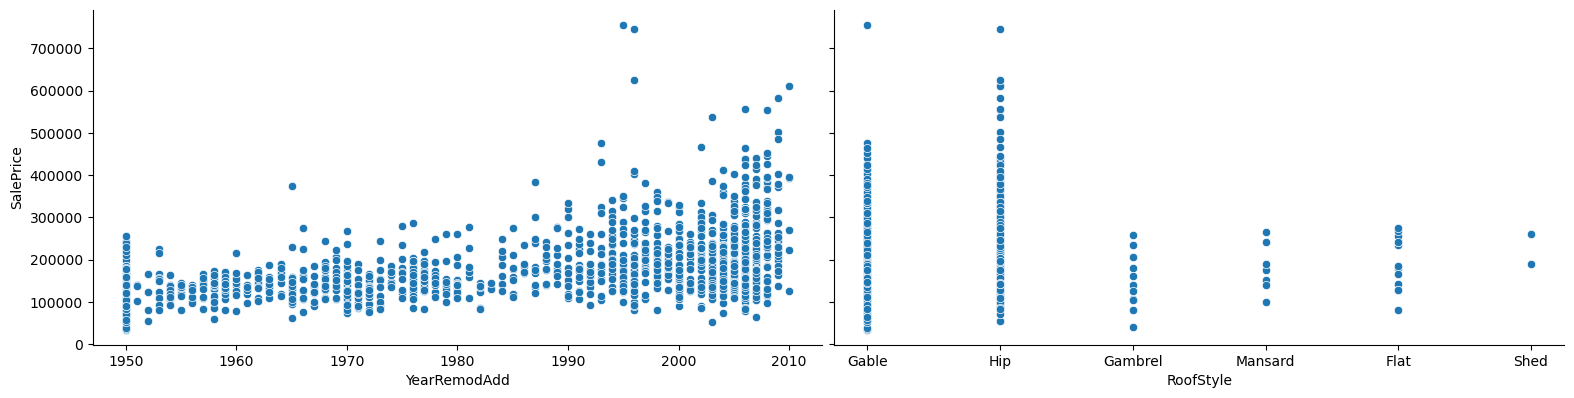

['RoofMatl' 'Exterior1st'] 24


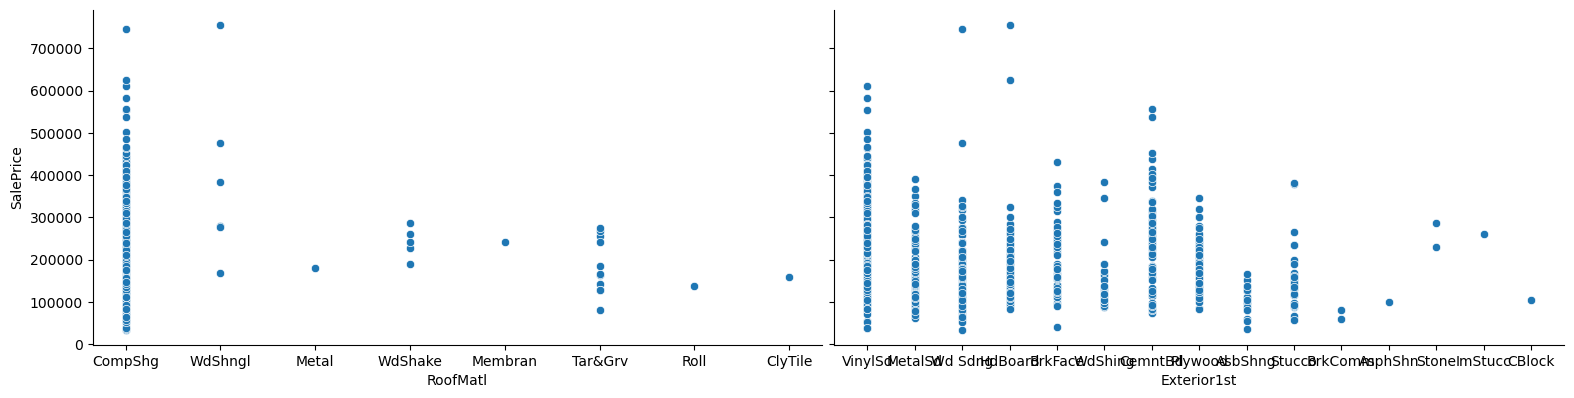

['Exterior2nd' 'MasVnrType'] 26


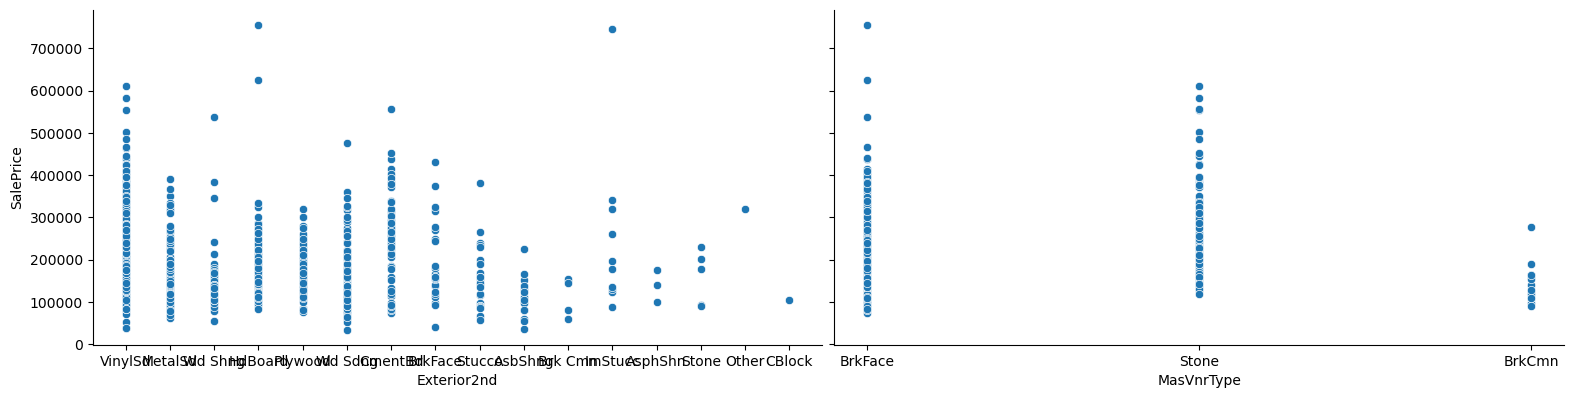

['MasVnrArea' 'ExterQual'] 28


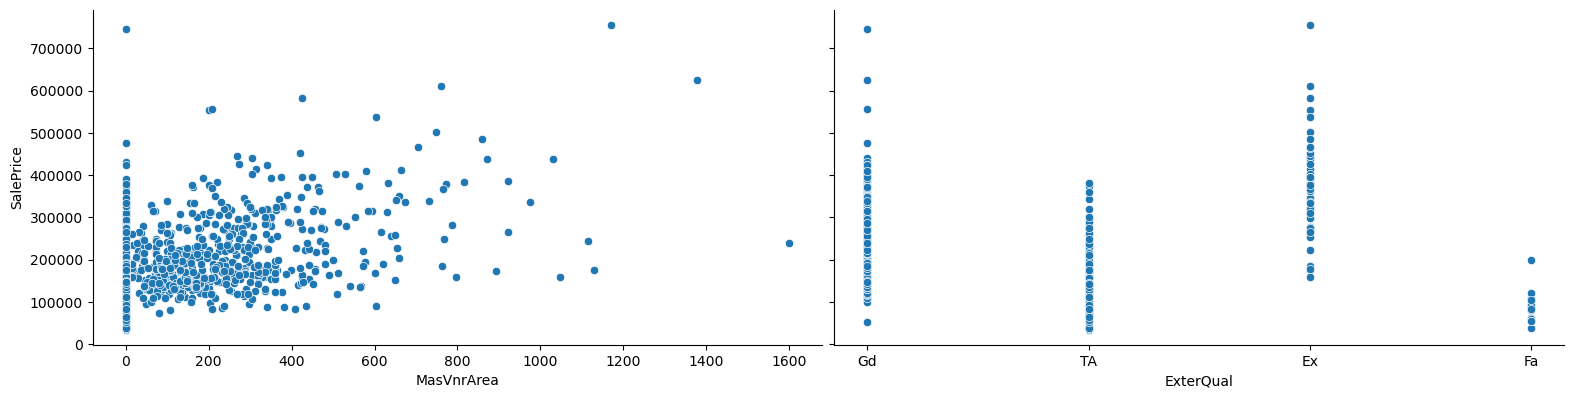

['ExterCond' 'Foundation'] 30


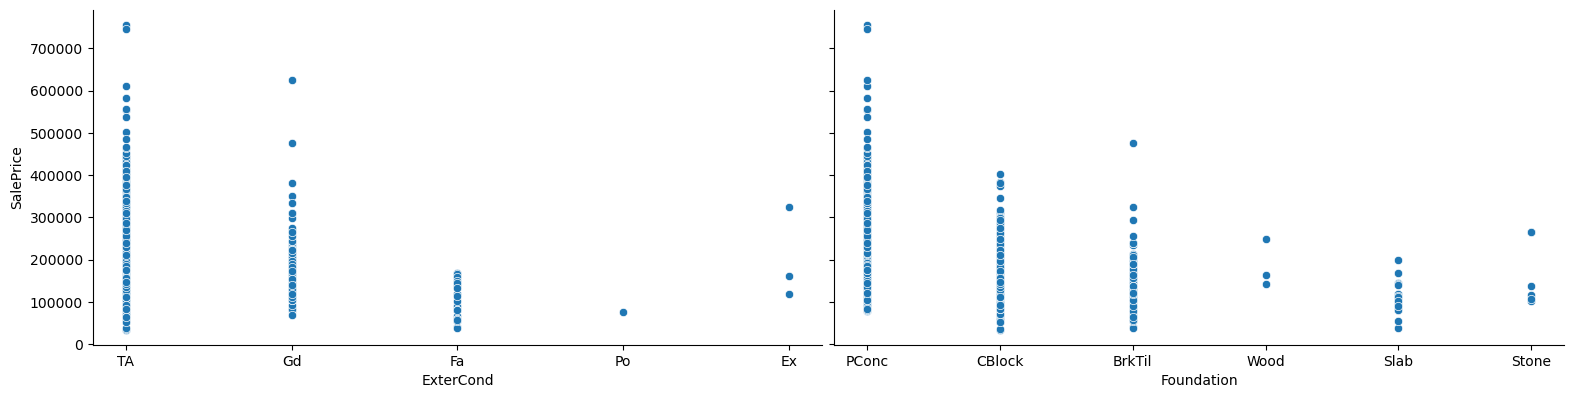

['BsmtQual' 'BsmtCond'] 32


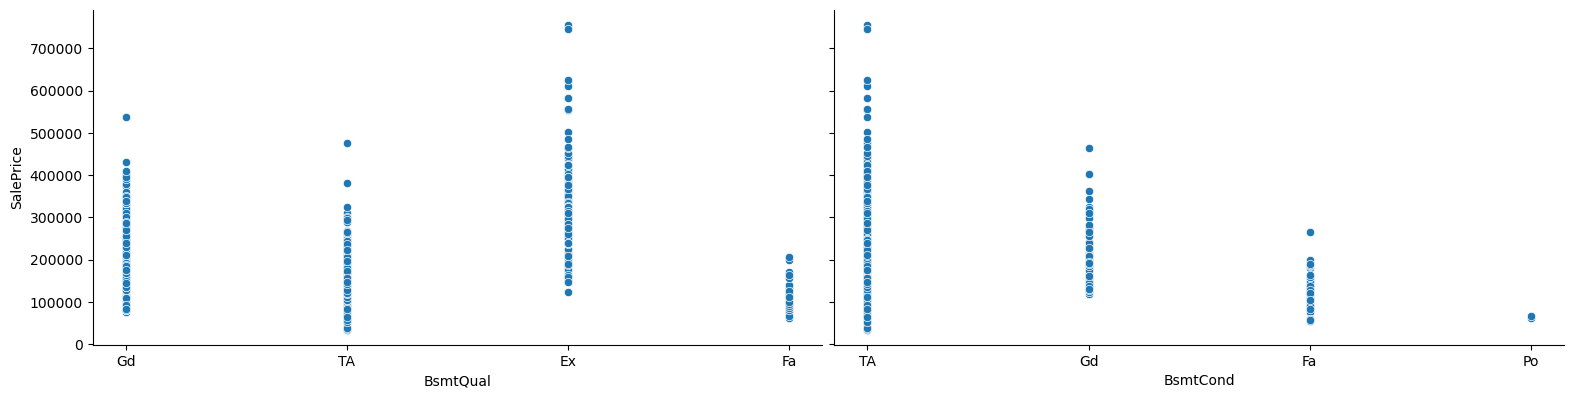

['BsmtExposure' 'BsmtFinType1'] 34


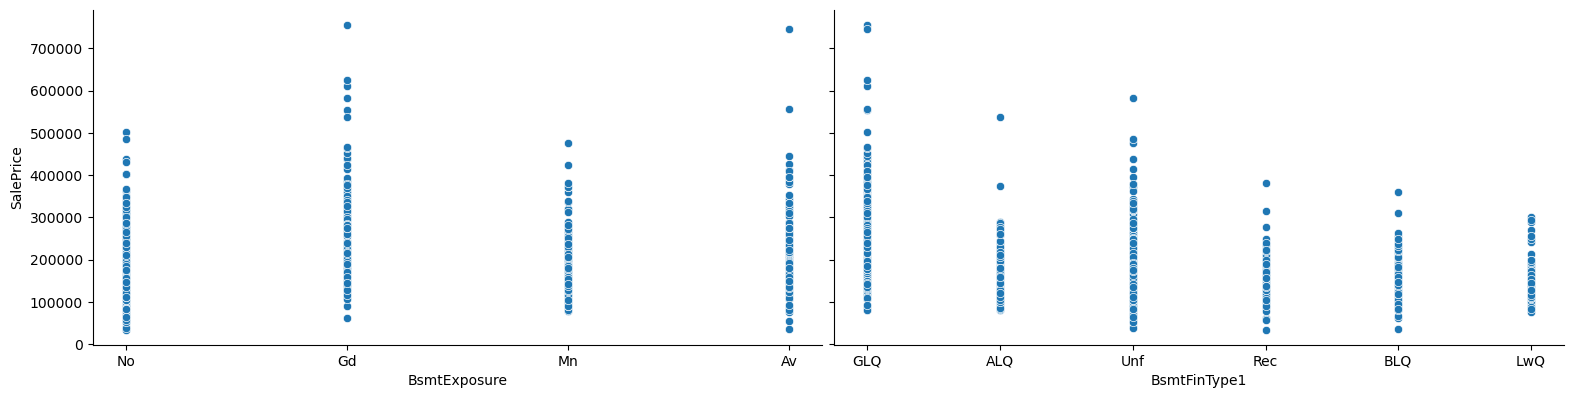

['BsmtFinSF1' 'BsmtFinType2'] 36


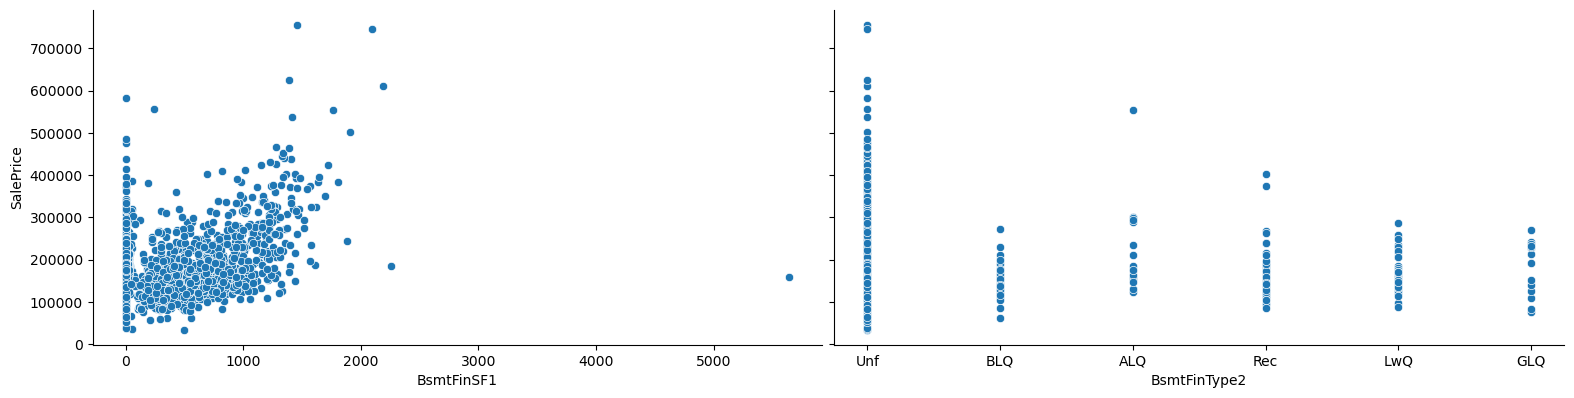

['BsmtFinSF2' 'BsmtUnfSF'] 38


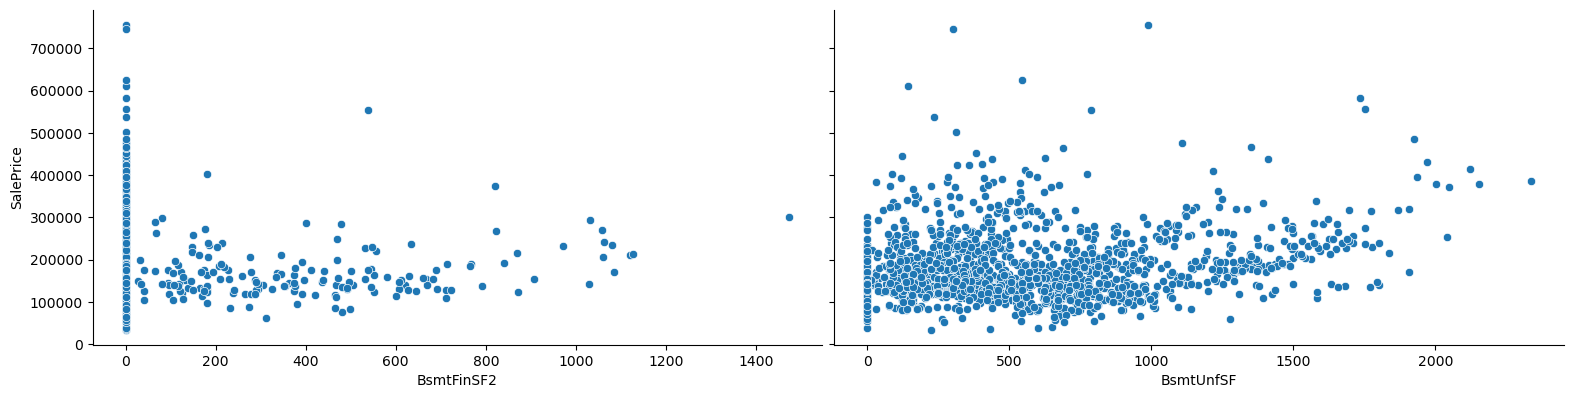

['TotalBsmtSF' 'Heating'] 40


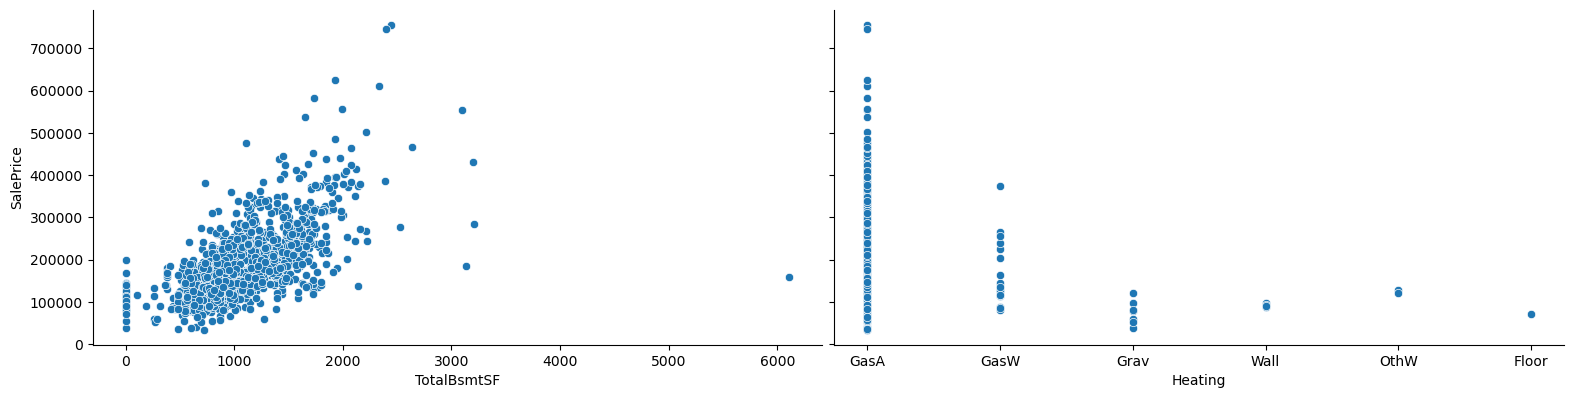

['HeatingQC' 'CentralAir'] 42


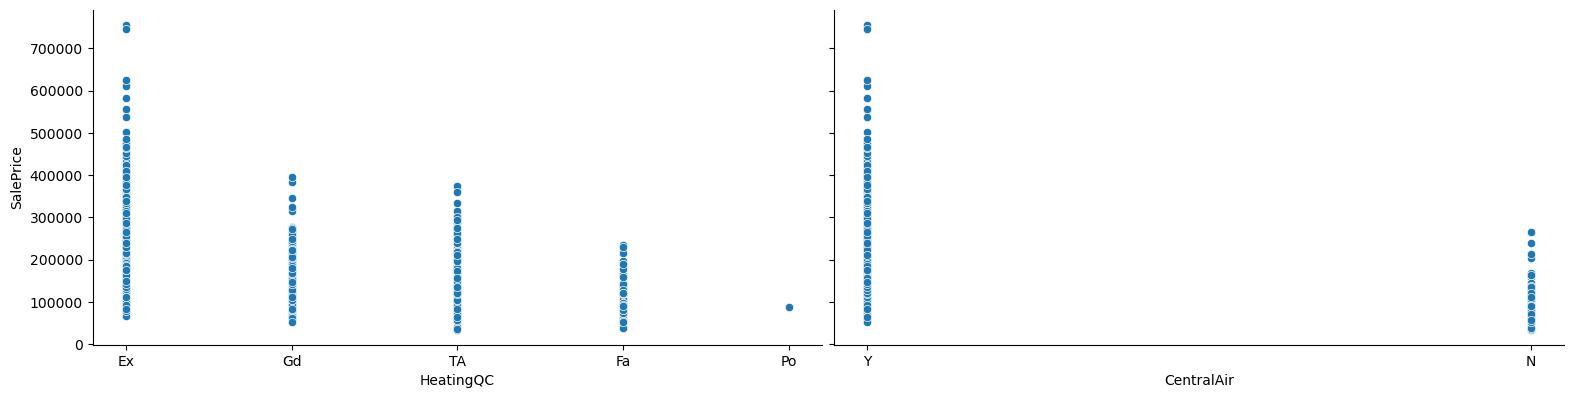

['Electrical' '1stFlrSF'] 44


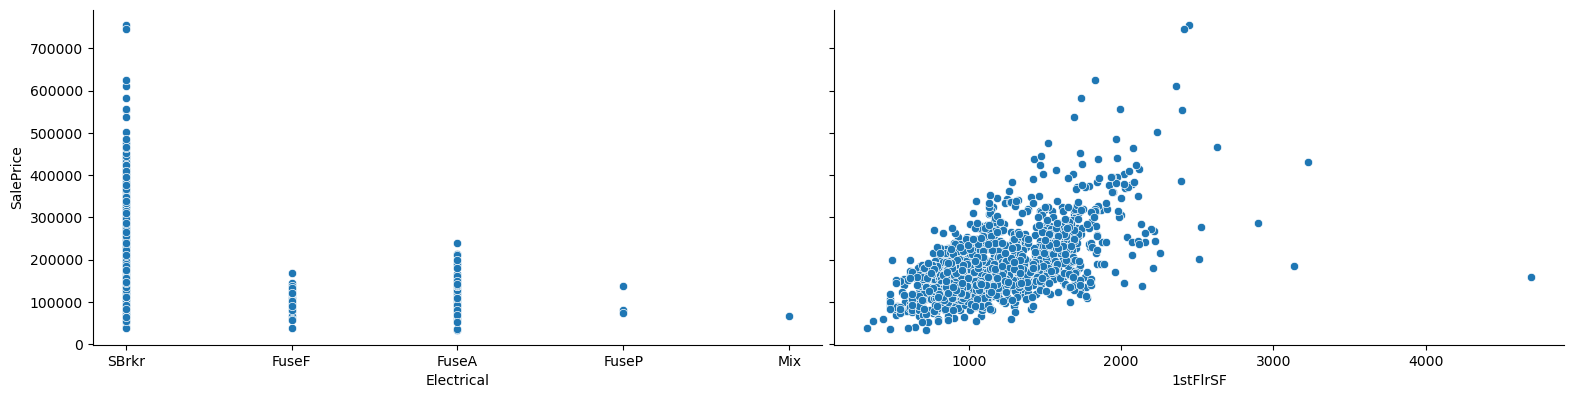

['2ndFlrSF' 'LowQualFinSF'] 46


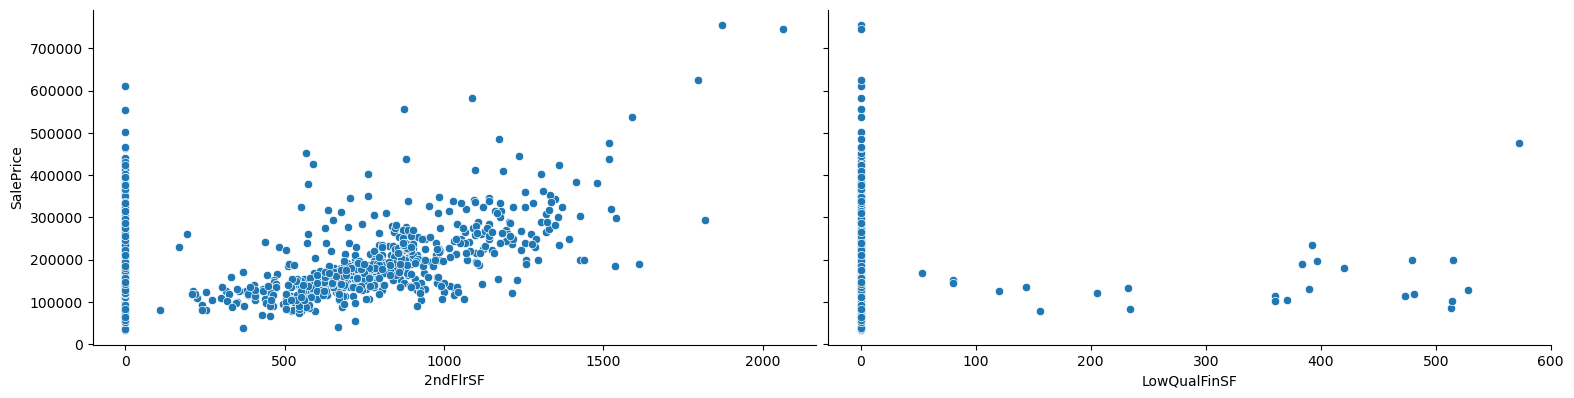

['GrLivArea' 'BsmtFullBath'] 48


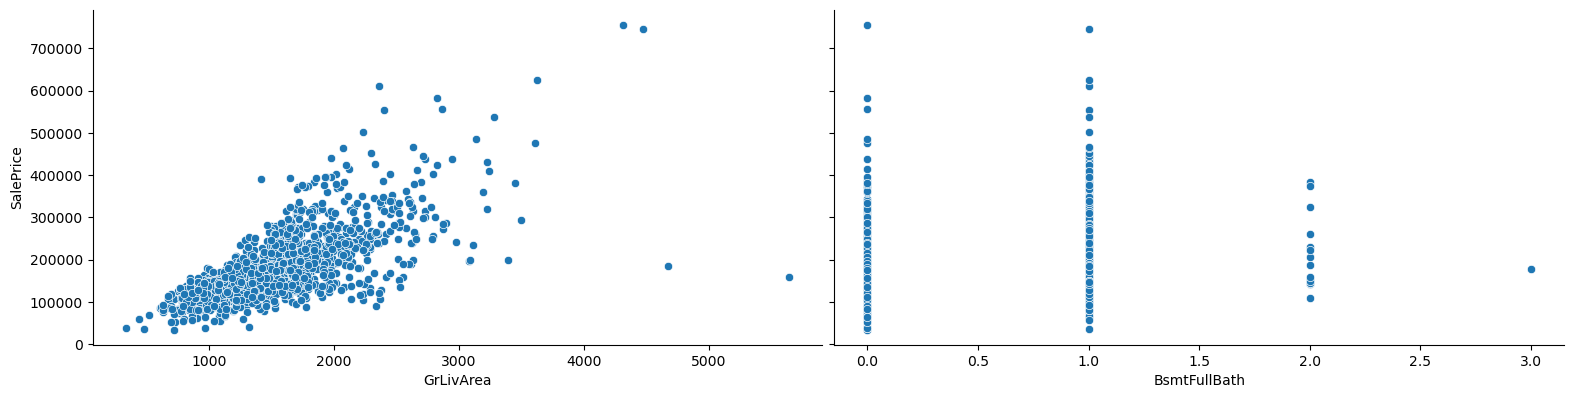

['BsmtHalfBath' 'FullBath'] 50


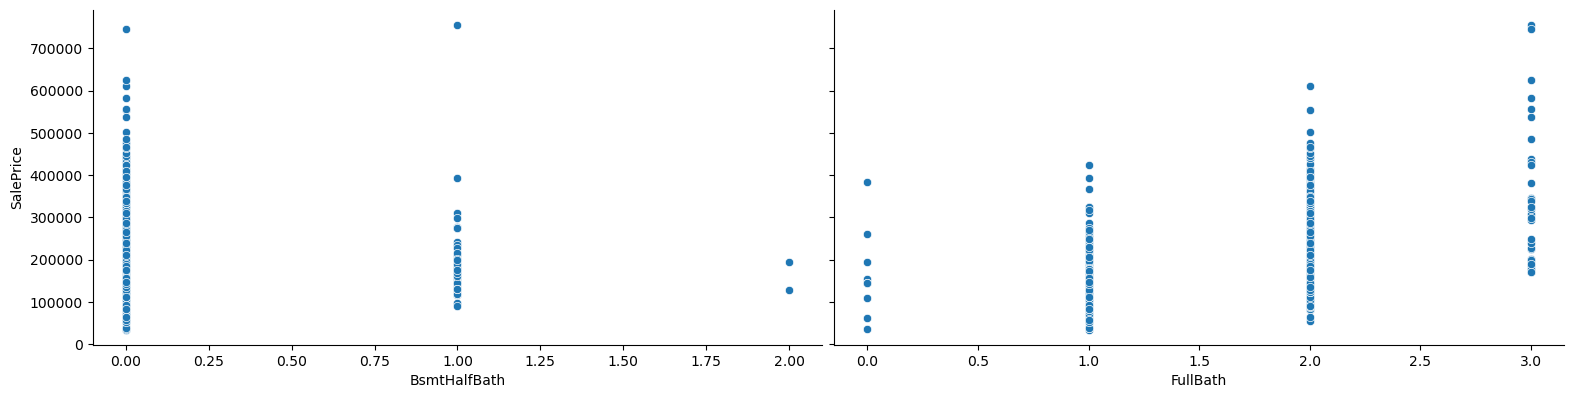

['HalfBath' 'BedroomAbvGr'] 52


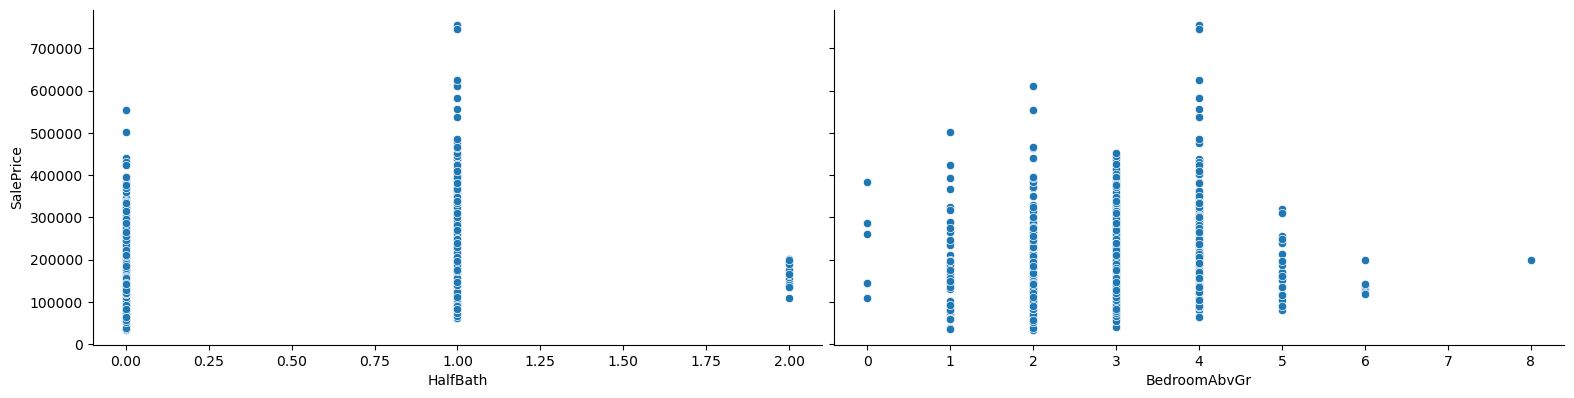

['KitchenAbvGr' 'KitchenQual'] 54


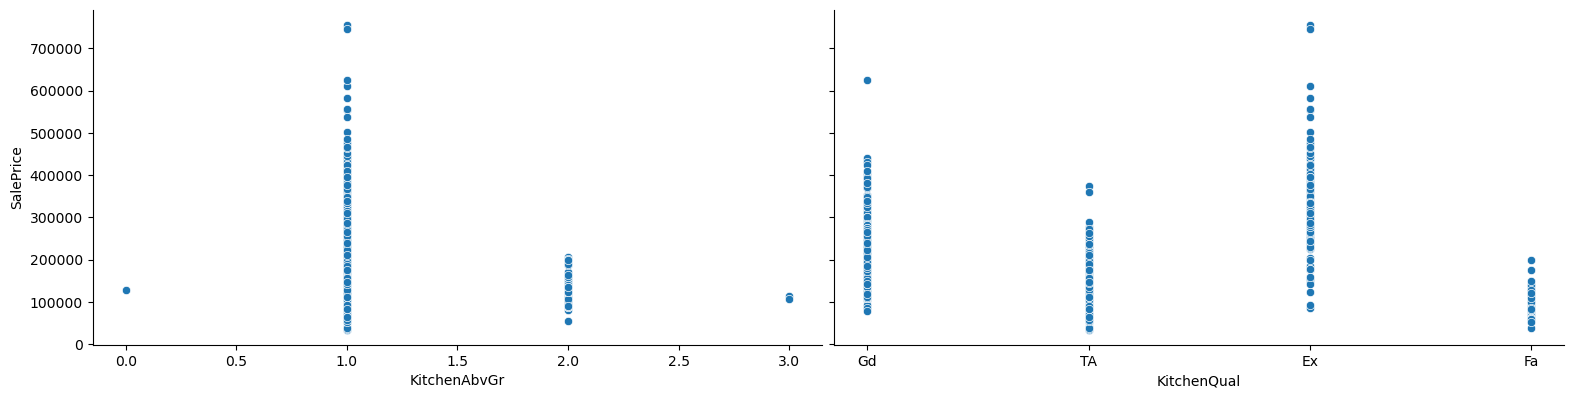

['TotRmsAbvGrd' 'Functional'] 56


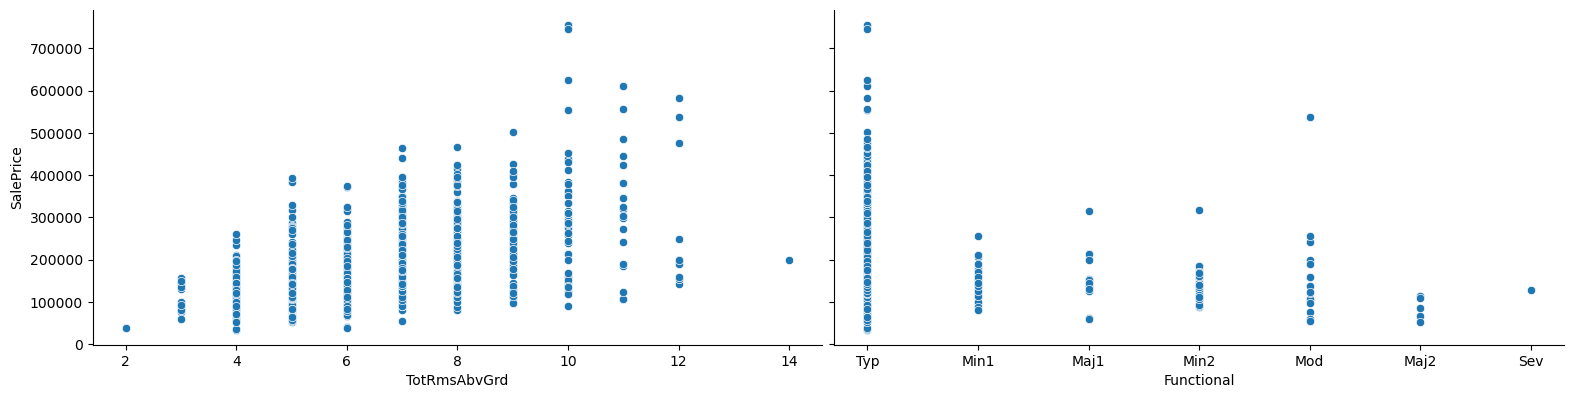

['Fireplaces' 'FireplaceQu'] 58


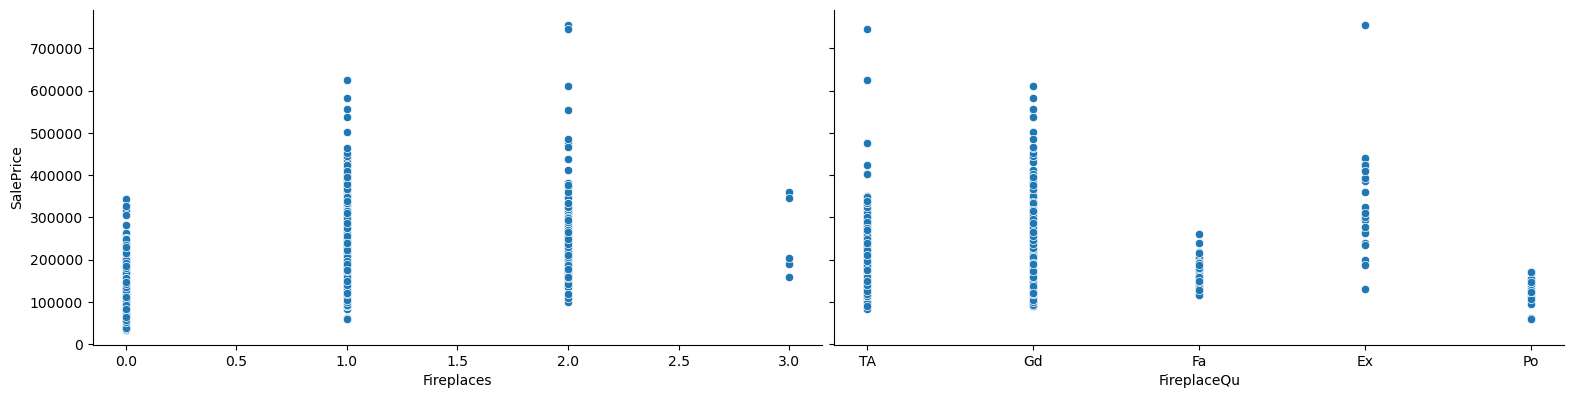

['GarageType' 'GarageYrBlt'] 60


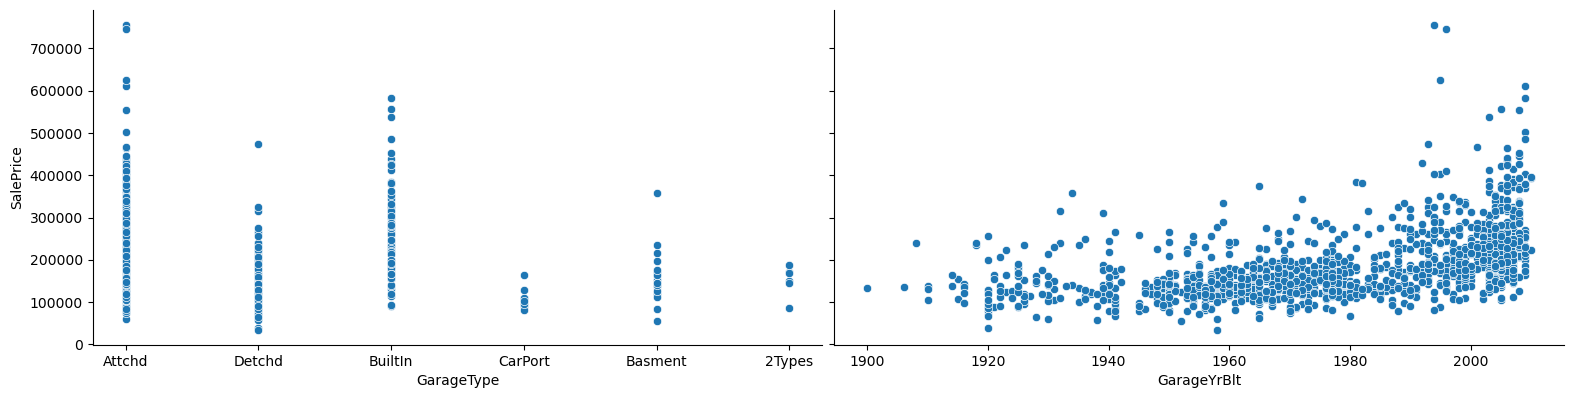

['GarageFinish' 'GarageCars'] 62


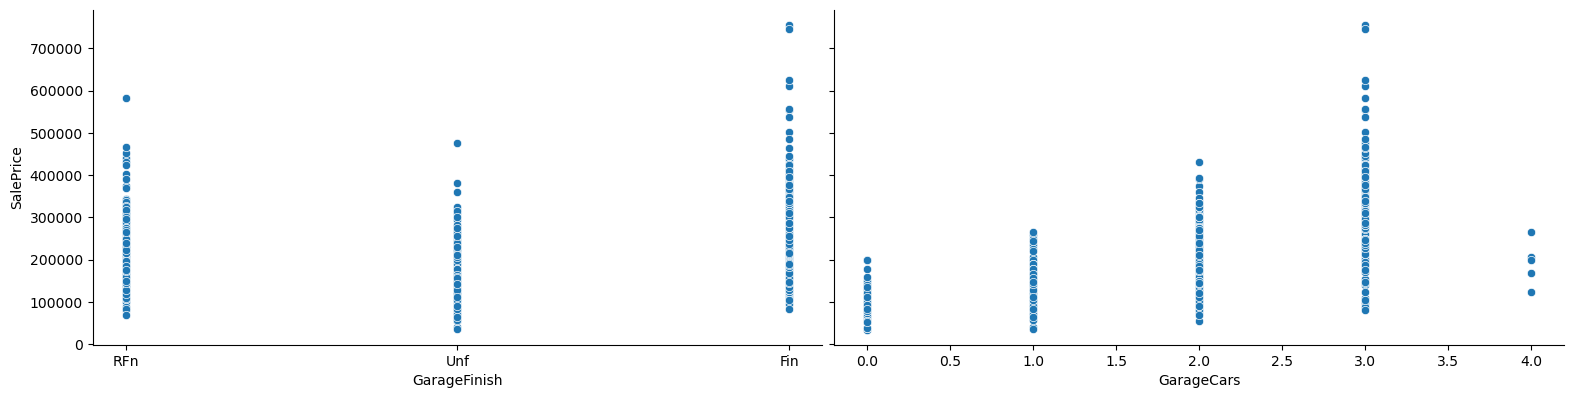

['GarageArea' 'GarageQual'] 64


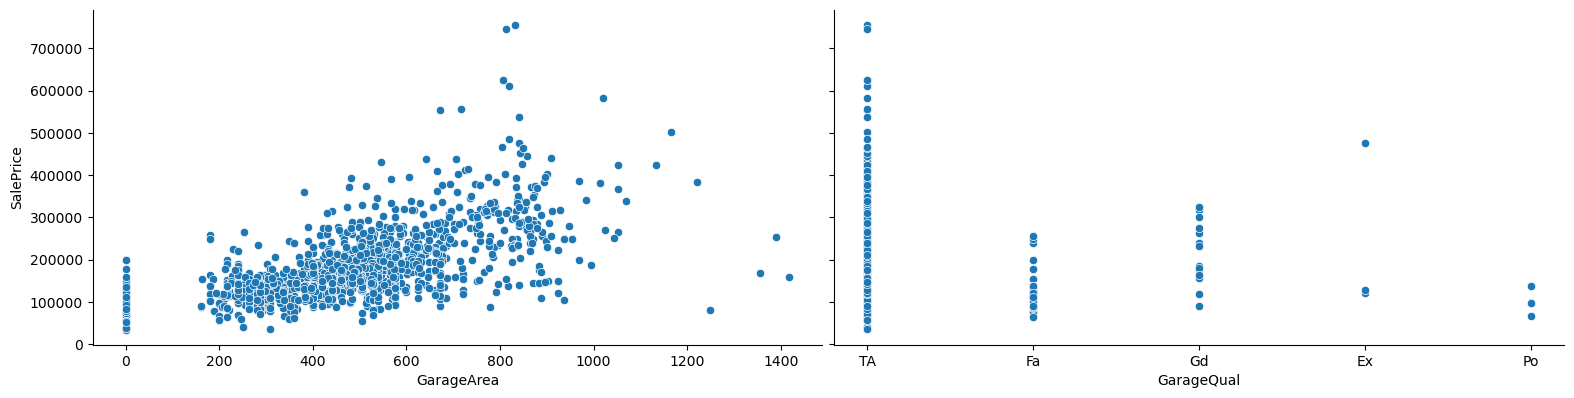

['GarageCond' 'PavedDrive'] 66


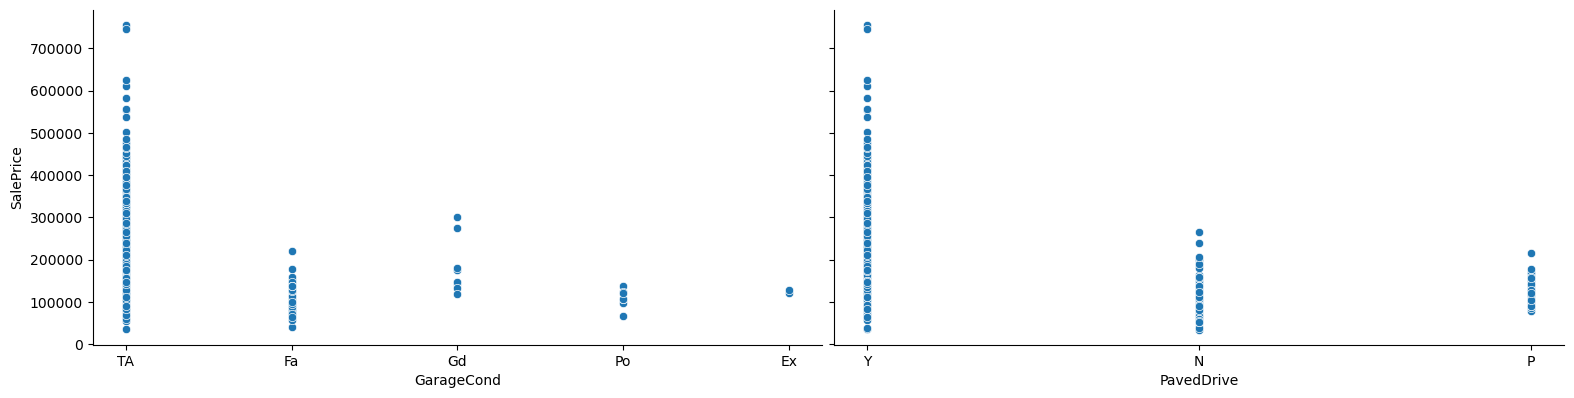

['WoodDeckSF' 'OpenPorchSF'] 68


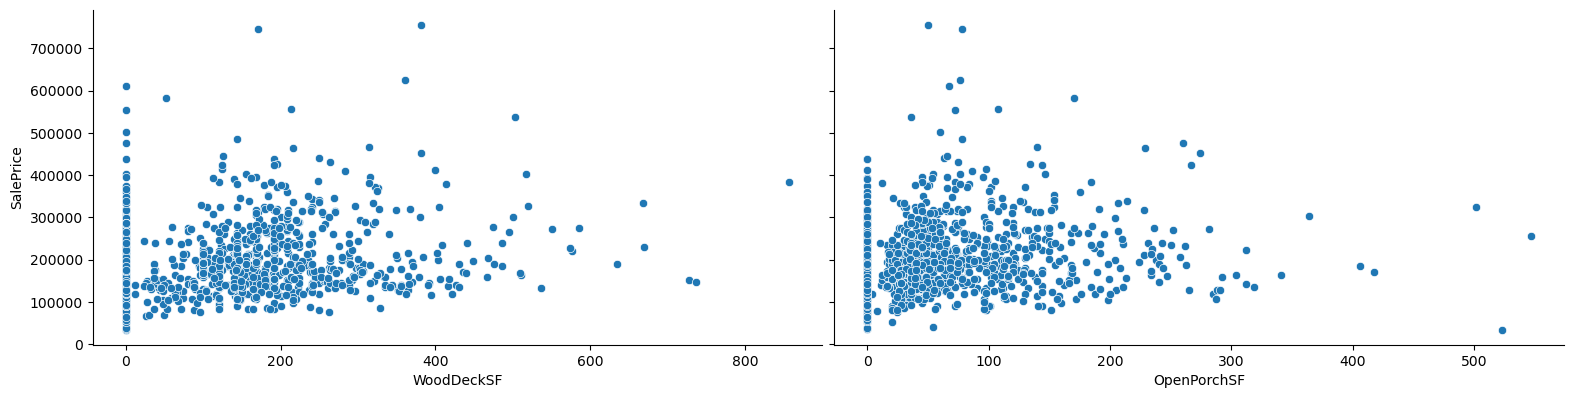

['EnclosedPorch' '3SsnPorch'] 70


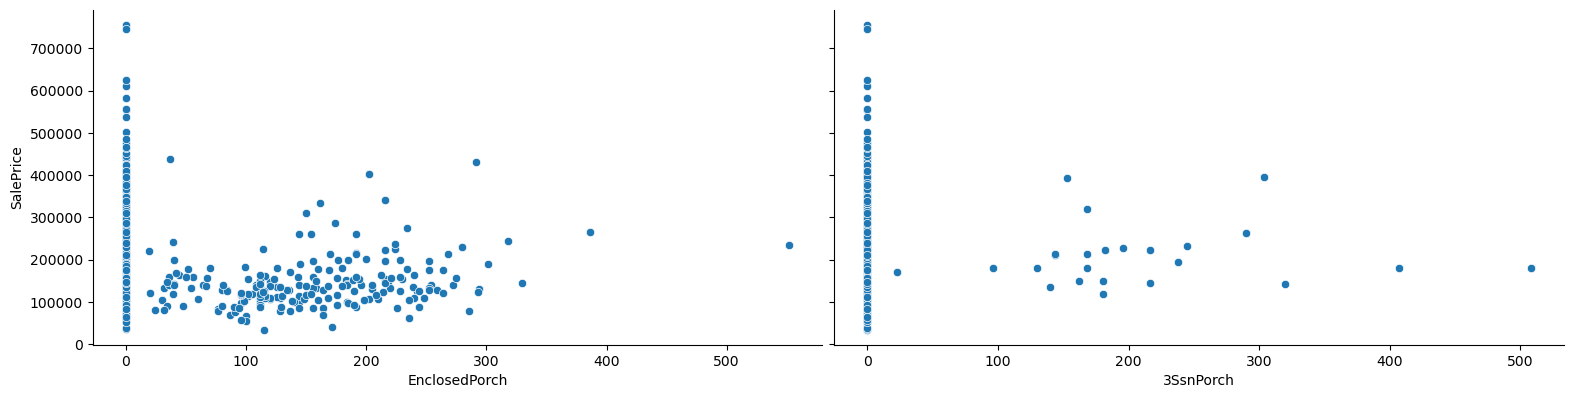

['ScreenPorch' 'PoolArea'] 72


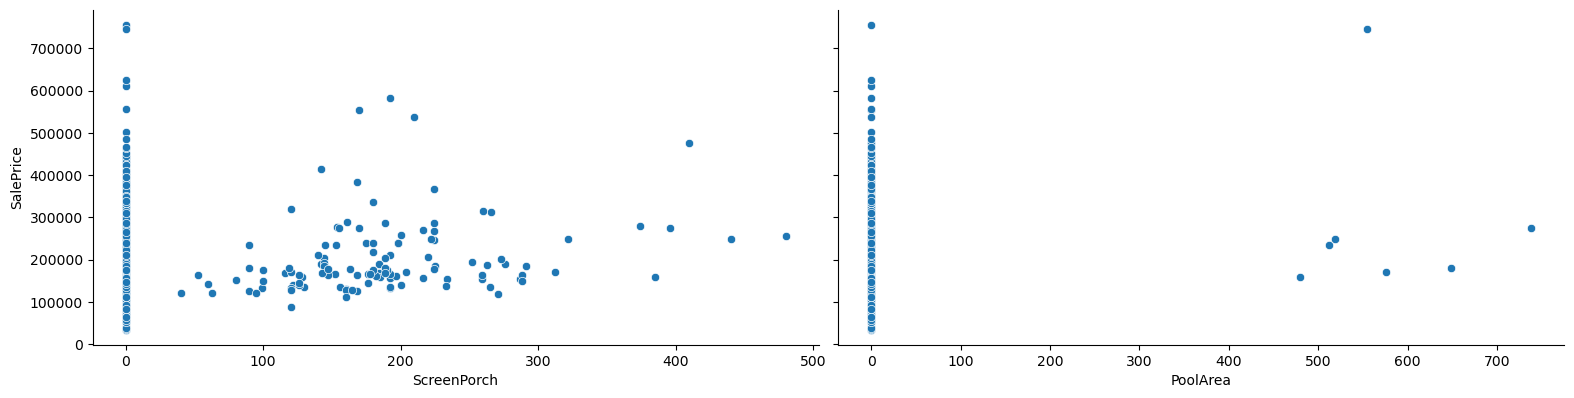

['PoolQC' 'Fence'] 74


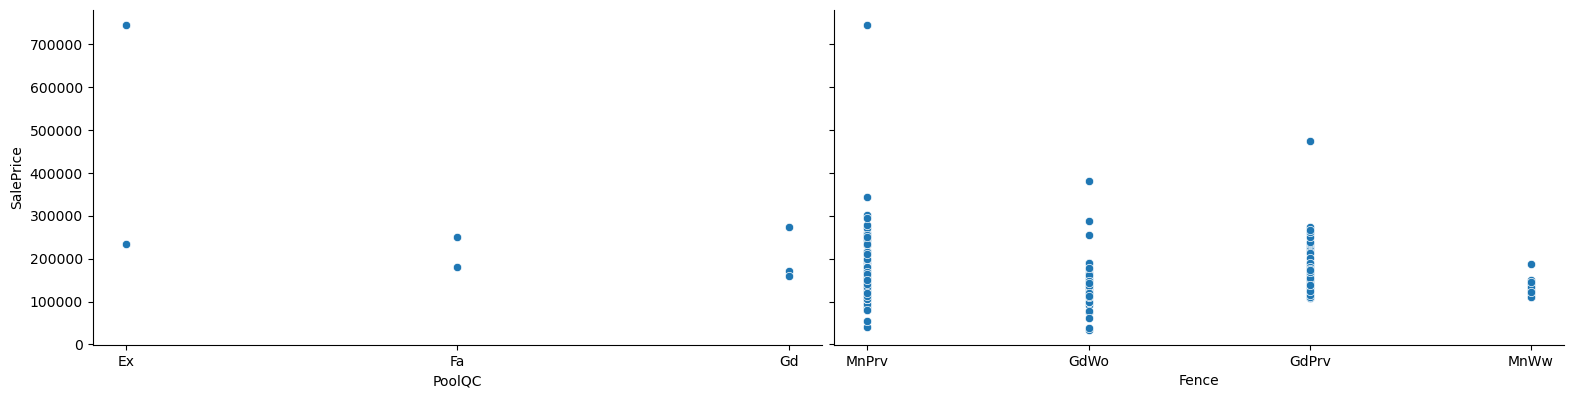

['MiscFeature' 'MiscVal'] 76


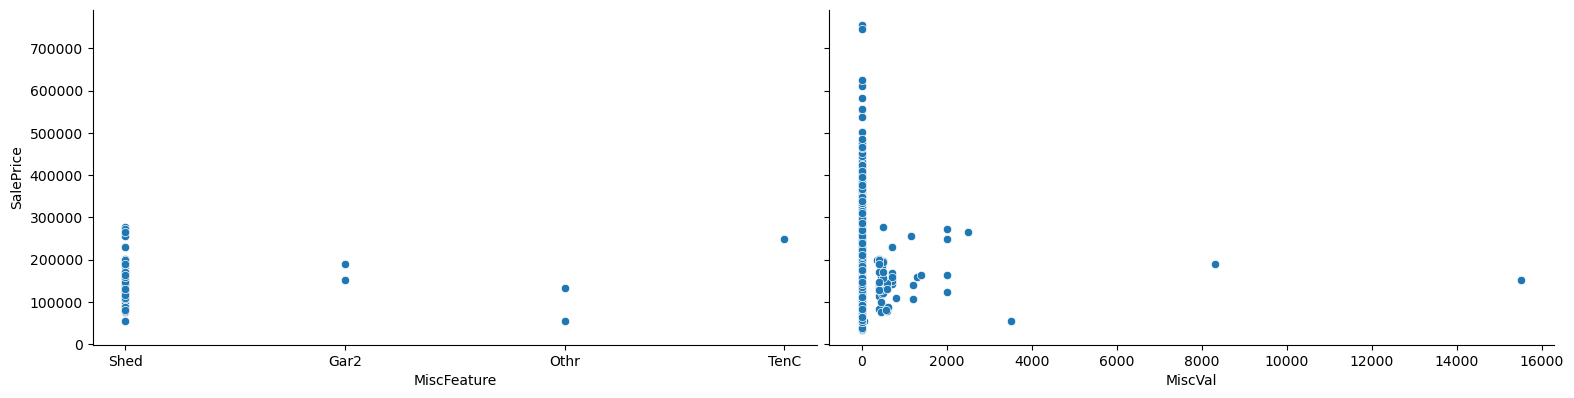

['MoSold' 'YrSold'] 78


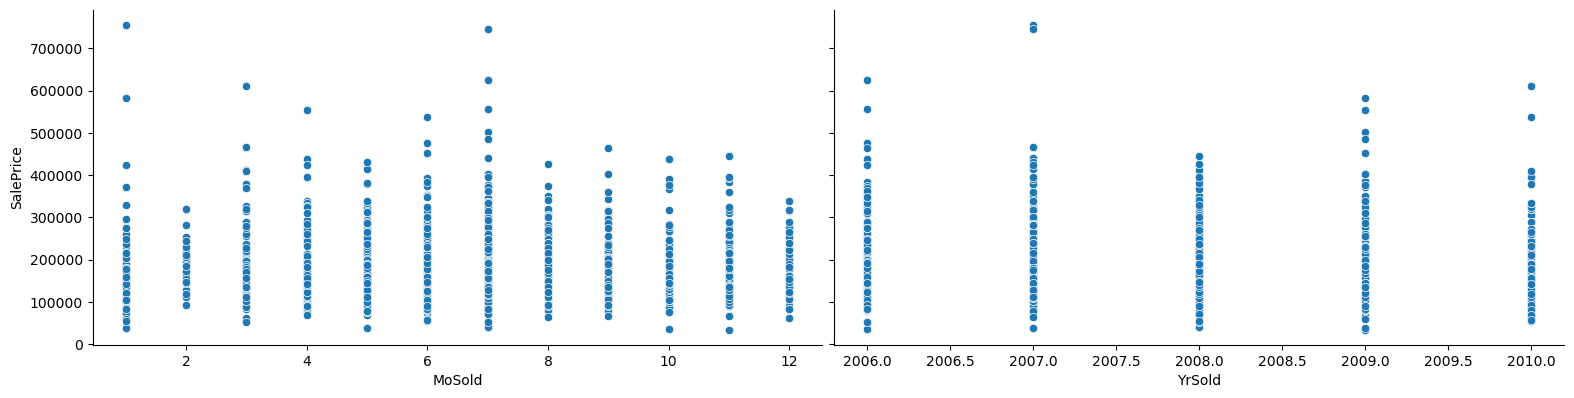

['SaleType' 'SaleCondition'] 80


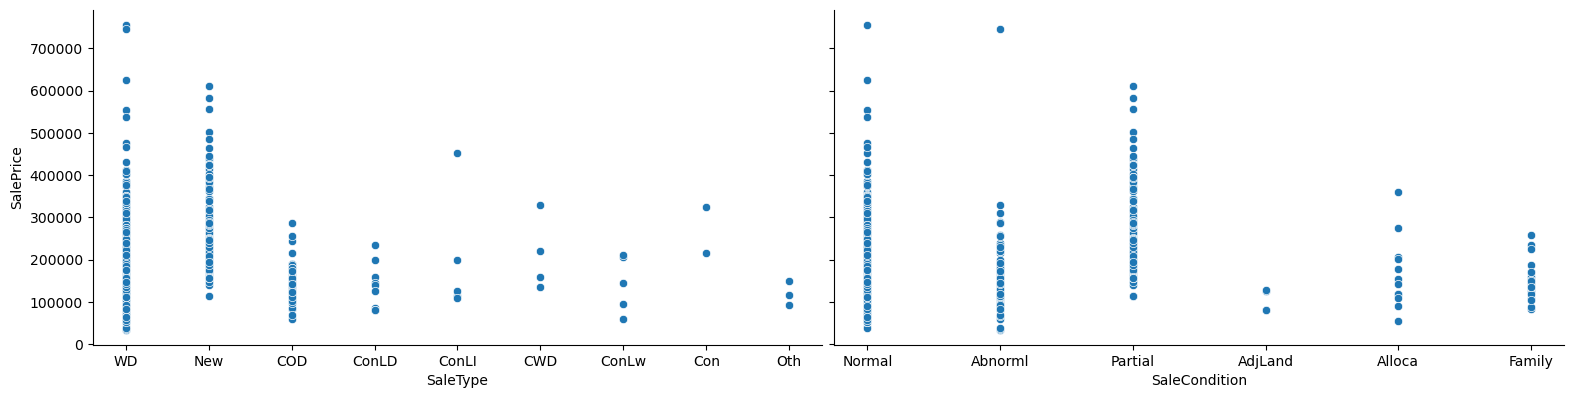

['SalePrice' 'BuiltToSale'] 82


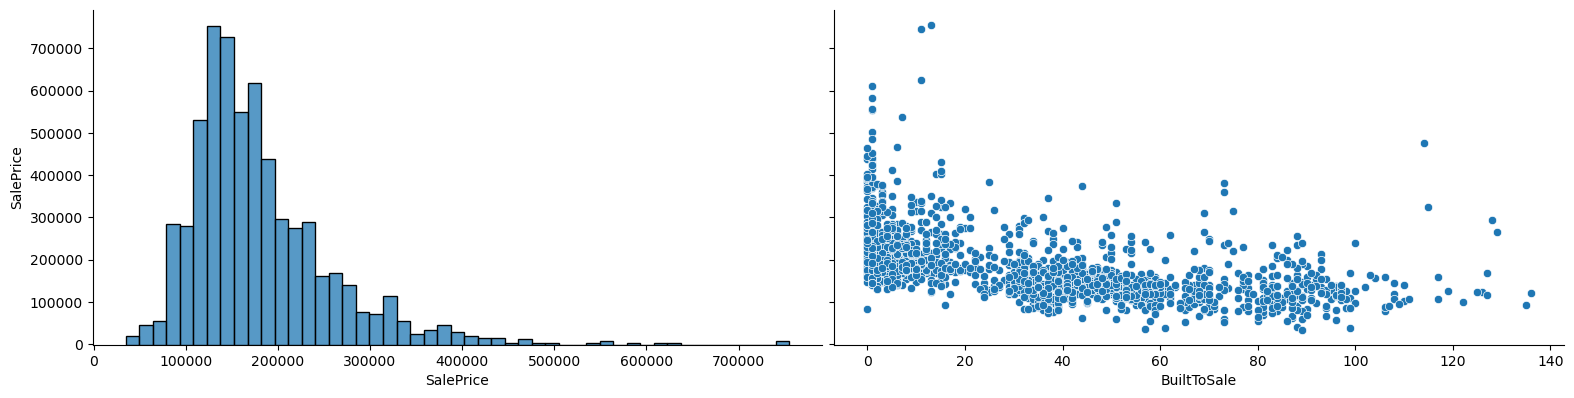

In [10]:
def pp(x):
    sns.pairplot(df, x_vars=x, y_vars='SalePrice',height=4, aspect=2, kind='scatter')
    plt.show()

i = 2
while i <= df.columns.size:
    print(df.columns[i-2:i].values, i)
    pp(df[df.columns[i-2:i].values])
    i +=2

Inferrence

To be removed:

1. ID: not relevant
2. MSSubClass: not relevant
3. MSZoning: not relevant
4. Alley: not relevant
5. LotShape: not relevant
6. Utilities: not relevant, to many data in AllPub
7. Condition2: the value is not well spreaded
8. RoofStyle: not well spreaded
9. SalePrice: not well spereaded
10. LowQualFinSF: too much null
11. BsmtFullBath: not relevant
12. BsmtHalfBath: not relevant
13. BedroomAbvGr: not relevant
14. KitchenAbvGr: somehow not relevant
15. Functional: not relevant, not well spreaded
16. Fireplaces: not relevant
17. FireplaceQu: not relevant
18. GarageType: not relevant
19. GarageCars: not relevant
20. PoolArea: most data missing
21. PoolQC: most data missing
22. MiscFeature: too many missing values
23. MiscVal: too many missing values
24. MoSold: not relevant
25. YrSold: not relevant

To be included:

1. LotFrontage: somehow relevant?? use median for null
2. LotArea: somehow relevant?? use median for null
3. LotConfig: need to be included for more explorations
4. LandSlope: need to be included for more explorations
5. LandContour: need to be included for more explorations
6. Neighborhood: need to be included for more explorations
7. Condition 1: need to be included for more explorations
8. BldgType: need to be included for more explorations
9. HouseStyle: need to be included for more explorations
10. OverallQual: somehow relevant?
11. OverallCond: somehow well spreaded, but we have to use median value for outlier
12. YearBuilt: included. use median value for outlier
13. YearRemodAdd: somehow relevant
14. Exterior1st: somehow relevant
15. Exterior2nd: somehow relevant
16. MasVnrType: seems like well spreaded
17. MasVnrArea: use median for null value
18. BsmtQual: need for more explorations
19. BsmtCond: need for more explorations
20. BsmtExposure: included
21. BsmtFinType1: included
21. BsmtFinType2: included
22. BsmtFinSF1: relevant, use null value with median
23. BsmtFinSF2: relevant, use null value with median
24. BsmtUnfSF: relevant, use null value with median
25. TotalBsmtSF: relevant, use null value with median
26. Electrical: included
27. 1stFlrSF: relevant, use median for null value
28. 2ndFlrSF: relevant, use median for null value
29. GrLivArea: relevant
30. FullBath: the trend is relevant
31. KitchenQual: use most popular categories
32. TotRmsAbvGrd: relevant, use medan
33. GarageYrBlt: relevant, use median
34. GarageFinish: value is well spread, use most categories fo n/a
35. GarageArea: included, unll with median
36. GarageQual: included, use most categories for n/a
37. PavedDrive: included
38. WoodDeckSF: included, use median
39. OpenPorchSF: included, use median
40. EnclosedPorch: included, use median
41. Fence: included
42. BuiltToSale: relevant, use median
43. SaleType: use most categories
44. SaleCondition: use most categoriess

In confussion:

1. Street: Gravel somehow less pricy than pave road

In [11]:
to_be_removed = [
    'Id',
    'MSSubClass',
    'MSZoning',
    'Alley',
    'LotShape',
    'Utilities',
    'Condition2',
    'RoofStyle',
    'SalePrice',
    'LowQualFinSF',
    'BsmtFullBath',
    'BsmtHalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'Functional',
    'Fireplaces',
    'FireplaceQu',
    'GarageType',
    'GarageCars',
    'PoolArea',
    'PoolQC',
    'MiscFeature',
    'MiscVal',
    'MoSold',
    'YrSold'
]

to_be_included = [
    'Street'
    'LotFrontage',
    'LotArea',
    'LotConfig',
    'LandSlope',
    'LandContour',
    'Neighborhood',
    'Condition 1',
    'BldgType',
    'HouseStyle',
    'OverallQual',
    'OverallCond',
    'YearBuilt',
    'YearRemodAdd',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'MasVnrArea',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'Electrical',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'FullBath',
    'KitchenQual',
    'TotRmsAbvGrd',
    'GarageYrBlt',
    'GarageFinish',
    'GarageArea',
    'GarageQual',
    'PavedDrive',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    'Fence',
    'BuiltToSale',
    'SaleType',
    'SaleCondition',
]

In [12]:
df_1 = df.drop(columns=to_be_removed)
df_1.head()

,LotFrontage,LotArea,Street,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,SaleType,SaleCondition,BuiltToSale
0,65.0,8450,Pave,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,1710,2,1,Gd,8,2003.0,RFn,548,TA,TA,Y,0,61,0,0,0,NaN,WD,Normal,5
1,80.0,9600,Pave,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,2,0,TA,6,1976.0,RFn,460,TA,TA,Y,298,0,0,0,0,NaN,WD,Normal,31
2,68.0,11250,Pave,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,1786,2,1,Gd,6,2001.0,RFn,608,TA,TA,Y,0,42,0,0,0,NaN,WD,Normal,7
3,60.0,9550,Pave,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,0,Gd,7,1998.0,Unf,642,TA,TA,Y,0,35,272,0,0,NaN,WD,Abnorml,91
4,84.0,14260,Pave,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,2,1,Gd,9,2000.0,RFn,836,TA,TA,Y,192,84,0,0,0,NaN,WD,Normal,8


In [13]:
object_features = df_1.select_dtypes(include=['object']).columns
object_missing = df_1[object_features].isnull().sum()
object_missing = object_missing[object_missing > 0].sort_values(ascending=False)

object_missing

Fence           1179
MasVnrType       872
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
Electrical         1
dtype: int64

In [14]:
for column in object_missing.index:
    mode_value = df_1[column].mode()[0]
    df_1[column].fillna(mode_value, inplace=True)

df_1[object_features].isnull().sum()

Street           0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
Fence            0
SaleType         0
SaleCondition    0
dtype: int64

In [15]:
df_1 = pd.get_dummies(df_1, columns=object_features)
df_1.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,BuiltToSale,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,1710,2,1,8,2003.0,548,0,61,0,0,0,5,False,True,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,Fa

In [16]:
df_1.shape

(1460, 224)

In [17]:
df_1.fillna(df_1.median(), inplace=True)

numerical_features = df_1.select_dtypes(include=['int64', 'float64']).columns
numerical_missing = df_1[numerical_features].isnull().sum()

numerical_missing

LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
FullBath         0
HalfBath         0
TotRmsAbvGrd     0
GarageYrBlt      0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
BuiltToSale      0
dtype: int64

In [18]:
df_1.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,BuiltToSale
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,1.565068,0.382877,6.517808,1978.589041,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,36.547945
std,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,0.550916,0.502885,1.625393,23.997022,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,30.250152
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,2.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,1.000000,0.000000,5.000000,1962.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,2.000000,0.000000,6.000000,1980.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,35.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,2.000000,1.000000,7.000000,2001.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,54.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,2.000000,14.000000,2010.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,136.000000


# Model 1

In [19]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(df_1, df['SalePrice'], test_size=0.3, random_state=42)

model_1 = LinearRegression()
model_1.fit(X_train, y_train)
model_1

LinearRegression()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model_1.predict(X_test)
print("mean squared error: ",mean_squared_error(y_test, y_pred))
print("mean absolute error test: ",mean_absolute_error(y_test, y_pred))
print("r2 score test: ",r2_score(y_test, y_pred))

y_pred = model_1.predict(X_train)
print("mean squared error: ",mean_squared_error(y_train, y_pred))
print("mean absolute error train: ",mean_absolute_error(y_train, y_pred))
print("r2 score train: ",r2_score(y_train, y_pred))

mean squared error:  815189728.8427602
mean absolute error test:  18280.235879573454
r2 score test:  0.8831787366621698
mean squared error:  508189869.3854504
mean absolute error train:  14156.247771806826
r2 score train:  0.9155630975976116


In [21]:
# plt.figure(figsize = (100, 100))
# sns.heatmap(df_1.corr(), annot = True, cmap="YlGnBu")
# plt.show()

In [22]:
most_relevant_column = pd.concat([df_1, df['SalePrice']], axis=1).corr()['SalePrice'].drop('SalePrice').sort_values(ascending=False).head(50)

most_relevant_column

OverallQual              0.790982
GrLivArea                0.708624
GarageArea               0.623431
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
FullBath                 0.560664
BsmtQual_Ex              0.553105
TotRmsAbvGrd             0.533723
YearBuilt                0.522897
YearRemodAdd             0.507101
KitchenQual_Ex           0.504094
Foundation_PConc         0.497734
MasVnrArea               0.472614
GarageYrBlt              0.466754
ExterQual_Gd             0.452466
ExterQual_Ex             0.451164
BsmtFinType1_GLQ         0.434597
HeatingQC_Ex             0.434543
GarageFinish_Fin         0.419678
Neighborhood_NridgHt     0.402149
BsmtFinSF1               0.386420
SaleType_New             0.357509
SaleCondition_Partial    0.352060
LotFrontage              0.334771
MasVnrType_Stone         0.330476
Neighborhood_NoRidge     0.330424
WoodDeckSF               0.324413
KitchenQual_Gd           0.321641
2ndFlrSF                 0.319334
OpenPorchSF   

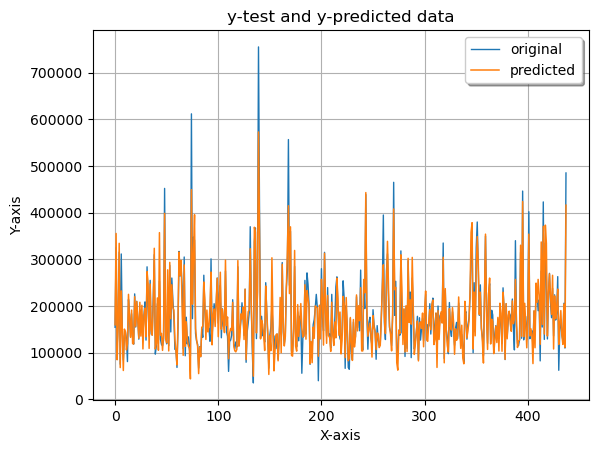

In [23]:
# Visualize predicted and test data

y_pred = model_1.predict(X_test)

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

### Conclussion

Somehow the model prediction is good, but the other metric like MSE is too high

## 2nd Try

In this segment, I will try to use mean instead of median, and one hot encoder lib from sklearn

In [24]:
df_2 = df.drop(columns=to_be_removed)

df_2.head()

,LotFrontage,LotArea,Street,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,SaleType,SaleCondition,BuiltToSale
0,65.0,8450,Pave,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,1710,2,1,Gd,8,2003.0,RFn,548,TA,TA,Y,0,61,0,0,0,NaN,WD,Normal,5
1,80.0,9600,Pave,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,2,0,TA,6,1976.0,RFn,460,TA,TA,Y,298,0,0,0,0,NaN,WD,Normal,31
2,68.0,11250,Pave,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,1786,2,1,Gd,6,2001.0,RFn,608,TA,TA,Y,0,42,0,0,0,NaN,WD,Normal,7
3,60.0,9550,Pave,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,0,Gd,7,1998.0,Unf,642,TA,TA,Y,0,35,272,0,0,NaN,WD,Abnorml,91
4,84.0,14260,Pave,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,2,1,Gd,9,2000.0,RFn,836,TA,TA,Y,192,84,0,0,0,NaN,WD,Normal,8


In [25]:
# Fill object missing values

object_features = df_2.select_dtypes(include=['object']).columns
object_missing = df_2[object_features].isnull().sum()
object_missing = object_missing[object_missing > 0].sort_values(ascending=False)

for column in object_missing.index:
    mode_value = df_2[column].mode()[0]
    df_2[column].fillna(mode_value, inplace=True)

df_2[object_features].isnull().sum()

Street           0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
Fence            0
SaleType         0
SaleCondition    0
dtype: int64

In [26]:
# Fill missing numeric values

df_2.fillna(df_2.mean(numeric_only=True), inplace=True)

numerical_features = df_2.select_dtypes(include=['int64', 'float64']).columns
numerical_missing = df_2[numerical_features].isnull().sum()

numerical_missing

LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
FullBath         0
HalfBath         0
TotRmsAbvGrd     0
GarageYrBlt      0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
BuiltToSale      0
dtype: int64

In [27]:
df_2 = pd.get_dummies(df_2, columns=object_features)
df_2.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,BuiltToSale,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,1710,2,1,8,2003.0,548,0,61,0,0,0,5,False,True,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,Fa

In [28]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(df_2, df['SalePrice'], test_size=0.3, random_state=42)

model_2 = LinearRegression()
model_2.fit(X_train, y_train)
model_2

LinearRegression()

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model_2.predict(X_test)
print("mean squared error: ",mean_squared_error(y_test, y_pred))
print("mean absolute error test: ",mean_absolute_error(y_test, y_pred))
print("r2 score test: ",r2_score(y_test, y_pred))

y_pred = model_2.predict(X_train)
print("mean squared error: ",mean_squared_error(y_train, y_pred))
print("mean absolute error train: ",mean_absolute_error(y_train, y_pred))
print("r2 score train: ",r2_score(y_train, y_pred))

mean squared error:  815349123.4774803
mean absolute error test:  18281.958408715156
r2 score test:  0.8831558945164234
mean squared error:  508176305.72292
mean absolute error train:  14155.869619751573
r2 score train:  0.9155653512309843


### Conclusion

There are no significant difference between model 1 and model 2

## 3rd Try

In this segment I will use one hot encoder lib from sklearn

In [30]:
df_3 = df.drop(columns=to_be_removed)

df_3.head()

,LotFrontage,LotArea,Street,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,SaleType,SaleCondition,BuiltToSale
0,65.0,8450,Pave,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,1710,2,1,Gd,8,2003.0,RFn,548,TA,TA,Y,0,61,0,0,0,NaN,WD,Normal,5
1,80.0,9600,Pave,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,2,0,TA,6,1976.0,RFn,460,TA,TA,Y,298,0,0,0,0,NaN,WD,Normal,31
2,68.0,11250,Pave,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,1786,2,1,Gd,6,2001.0,RFn,608,TA,TA,Y,0,42,0,0,0,NaN,WD,Normal,7
3,60.0,9550,Pave,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,0,Gd,7,1998.0,Unf,642,TA,TA,Y,0,35,272,0,0,NaN,WD,Abnorml,91
4,84.0,14260,Pave,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,2,1,Gd,9,2000.0,RFn,836,TA,TA,Y,192,84,0,0,0,NaN,WD,Normal,8


In [31]:
# Fill object missing values

object_features = df_3.select_dtypes(include=['object']).columns
object_missing = df_3[object_features].isnull().sum()
object_missing = object_missing[object_missing > 0].sort_values(ascending=False)

for column in object_missing.index:
    mode_value = df_3[column].mode()[0]
    df_3[column].fillna(mode_value, inplace=True)

df_3[object_features].isnull().sum()

Street           0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
Fence            0
SaleType         0
SaleCondition    0
dtype: int64

In [32]:
# Create an instance of One-hot-encoder 
enc = OneHotEncoder() 
  
# Passing encoded columns 
  
enc_data = pd.DataFrame(enc.fit_transform(df_3[object_features]).toarray())
enc_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0

In [33]:
df_3 = pd.concat([df_3.drop(columns=object_features), enc_data], axis=1)

In [34]:
# Fill missing numeric values

df_3.fillna(df_3.mean(numeric_only=True), inplace=True)

numerical_features = df_3.select_dtypes(include=['int64', 'float64']).columns
numerical_missing = df_3[numerical_features].isnull().sum()

numerical_missing

LotFrontage    0
LotArea        0
OverallQual    0
OverallCond    0
YearBuilt      0
              ..
194            0
195            0
196            0
197            0
198            0
Length: 224, dtype: int64

In [35]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(df_2, df['SalePrice'], test_size=0.3, random_state=42)

model_3 = LinearRegression()
model_3.fit(X_train, y_train)
model_3

LinearRegression()

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model_3.predict(X_test)
print("mean squared error: ",mean_squared_error(y_test, y_pred))
print("mean absolute error test: ",mean_absolute_error(y_test, y_pred))
print("r2 score test: ",r2_score(y_test, y_pred))

y_pred = model_3.predict(X_train)
print("mean squared error: ",mean_squared_error(y_train, y_pred))
print("mean absolute error train: ",mean_absolute_error(y_train, y_pred))
print("r2 score train: ",r2_score(y_train, y_pred))

mean squared error:  815349123.4774803
mean absolute error test:  18281.958408715156
r2 score test:  0.8831558945164234
mean squared error:  508176305.72292
mean absolute error train:  14155.869619751573
r2 score train:  0.9155653512309843


### Conclusion

No significance differences

## 4th Try

In this try, I will only select model with correlation -0.3 up to 0.3

In [37]:
df_4 = df_2
df_4.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,BuiltToSale,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,1710,2,1,8,2003.0,548,0,61,0,0,0,5,False,True,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,Fa

In [38]:
df_4.columns.shape

(224,)

In [39]:
# def pp(x):
#     sns.pairplot(pd.concat([df_4, df['SalePrice']], axis=1), x_vars=x, y_vars='SalePrice',height=4, aspect=2, kind='scatter')
#     plt.show()

# i = 2
# while i <= df_4.columns.size:
#     print(df_4.columns[i-2:i].values, i)
#     pp(df_4[df_4.columns[i-2:i].values])
#     i +=2

In [40]:
filtered_corr = (pd.concat([df_4, df['SalePrice']], axis=1).corr()['SalePrice'].abs().drop('SalePrice').sort_values(ascending=False) > 0.3)

filtered_corr_df = filtered_corr.to_frame()
selected_index = filtered_corr_df[filtered_corr_df['SalePrice'] == True].index

selected_index

Index(['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
       'ExterQual_TA', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd',
       'BuiltToSale', 'YearBuilt', 'KitchenQual_TA', 'GarageFinish_Unf',
       'YearRemodAdd', 'KitchenQual_Ex', 'BsmtQual_TA', 'Foundation_PConc',
       'MasVnrArea', 'GarageYrBlt', 'ExterQual_Gd', 'ExterQual_Ex',
       'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'GarageFinish_Fin',
       'Neighborhood_NridgHt', 'BsmtFinSF1', 'SaleType_New',
       'SaleCondition_Partial', 'Foundation_CBlock', 'LotFrontage',
       'MasVnrType_Stone', 'Neighborhood_NoRidge', 'WoodDeckSF',
       'KitchenQual_Gd', 'BsmtExposure_No', '2ndFlrSF', 'OpenPorchSF',
       'HeatingQC_TA', 'BsmtExposure_Gd', 'Exterior2nd_VinylSd',
       'Exterior1st_VinylSd'],
      dtype='object')

In [41]:
df_4 = df_4[selected_index]

df_4.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,ExterQual_TA,FullBath,BsmtQual_Ex,TotRmsAbvGrd,BuiltToSale,YearBuilt,KitchenQual_TA,GarageFinish_Unf,YearRemodAdd,KitchenQual_Ex,BsmtQual_TA,Foundation_PConc,MasVnrArea,GarageYrBlt,ExterQual_Gd,ExterQual_Ex,BsmtFinType1_GLQ,HeatingQC_Ex,GarageFinish_Fin,Neighborhood_NridgHt,BsmtFinSF1,SaleType_New,SaleCondition_Partial,Foundation_CBlock,LotFrontage,MasVnrType_Stone,Neighborhood_NoRidge,WoodDeckSF,KitchenQual_Gd,BsmtExposure_No,2ndFlrSF,OpenPorchSF,HeatingQC_TA,BsmtExposure_Gd,Exterior2nd_VinylSd,Exterior1st_VinylSd
0,7,1710,548,856,856,False,2,False,8,5,2003,False,False,2003,False,False,True,196.0,2003.0,True,False,True,True,False,False,706,False,False,False,65.0,False,False,0,True,True,854,61,False,False,True,True
1,6,1262,460,1262,1262,True,2,False,6,31,1976,True,False,1976,False,False,False,0.0,1976.0,False,False,False,True,False,False,978,False,False,True,80.0,False,False,298,False,False,0,0,False,True,False,False
2,7,1786,608,920,920,False,2,False,6,7,2001,False,False,2002,False,False,True,162.0,2001.0,True,False,True,True,False,False,486,False,False,False,68.0,False,False,0,True,False,866,42,False,False,True,True
3,7,1717,642,756,961,True,1,False,7,91,1915,False,True,1970,False,True,False,0.0,1998.0,False,False,False,False,False,False,216,False,False,False,60.0,False,False,0,True,True,756,35,False,False,False,False
4,8,2198,836,1145,1145,False,2,False,9,8,2000,False,False,2000,False,False,True,350.0,2000.0,True,False,True,True,False,False,655,False,False,False,84.0,False,True,192,True,False,1053,84,False,False,True,True


In [42]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(df_4, df['SalePrice'], test_size=0.3, random_state=42)

model_4 = LinearRegression()
model_4.fit(X_train, y_train)
model_4

LinearRegression()

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model_4.predict(X_test)
print("mean squared error: ",mean_squared_error(y_test, y_pred))
print("mean absolute error test: ",mean_absolute_error(y_test, y_pred))
print("r2 score test: ",r2_score(y_test, y_pred))

y_pred = model_4.predict(X_train)
print("mean squared error: ",mean_squared_error(y_train, y_pred))
print("mean absolute error train: ",mean_absolute_error(y_train, y_pred))
print("r2 score train: ",r2_score(y_train, y_pred))

mean squared error:  978821022.3662647
mean absolute error test:  20361.82819020732
r2 score test:  0.8597294539311968
mean squared error:  1093186745.0949388
mean absolute error train:  20606.839121737146
r2 score train:  0.8183645364383394


# 5h Try

Try to boxplot the saleprice once again, and remove outlier

In [44]:
df_5 = df_2

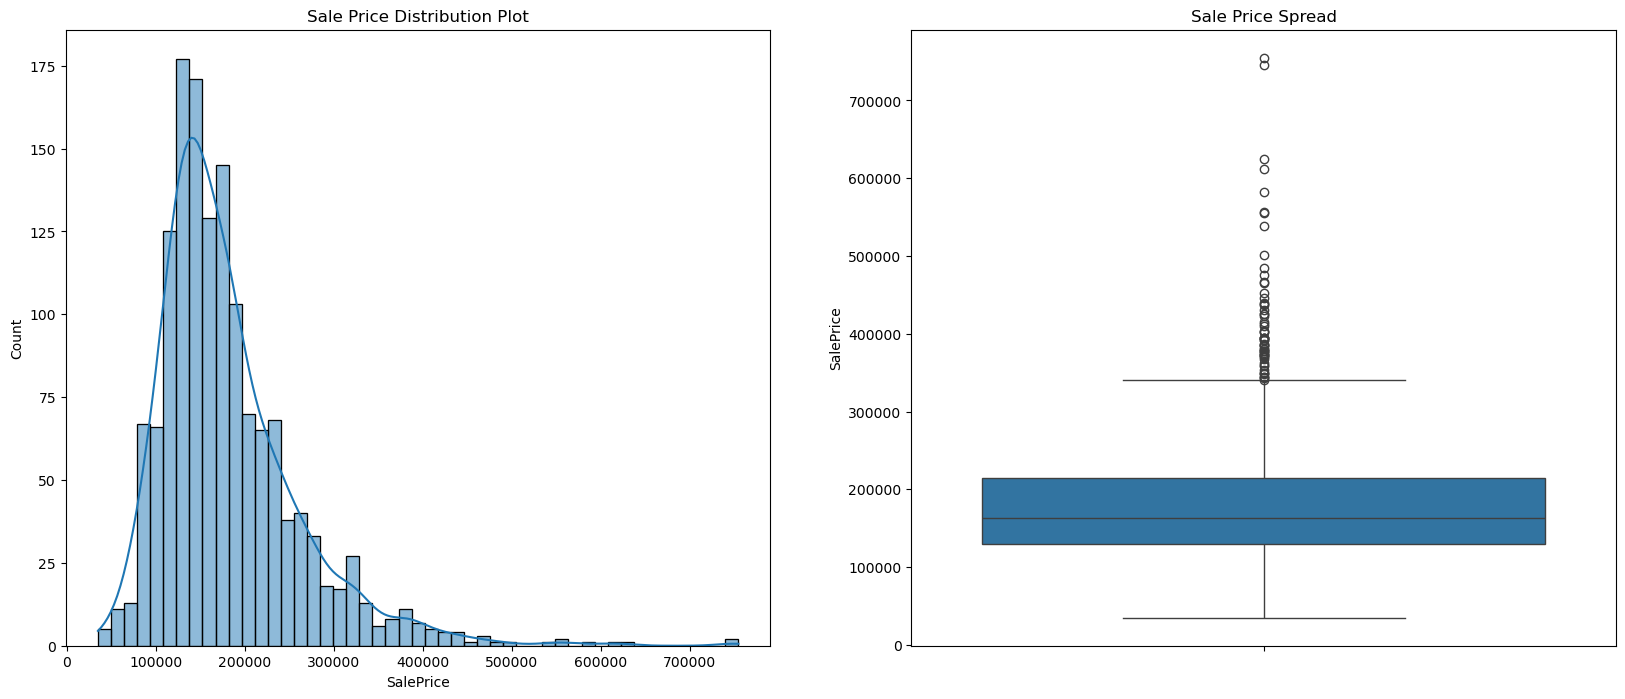

In [45]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Sale Price Distribution Plot')
sns.histplot(df.SalePrice, kde=True)

plt.subplot(1,2,2)
plt.title('Sale Price Spread')
sns.boxplot(y=df.SalePrice)

plt.show()

In [46]:
q1, q3 = np.percentile(df['SalePrice'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

iqr, lower_bound, upper_bound
# #create conditions to isolate the outliers
# outliers = data[(data < lower_bound) | (data > upper_bound)]
# print(outliers)

(84025.0, 3937.5, 340037.5)

In [47]:
outliers = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]

outliers

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BuiltToSale
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998,Unf,0,177,1175,GasA,Ex,Y,SBrkr,1182,1142,0,2324,1,0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.0,Fin,3,736,TA,TA,Y,147,21,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000,1
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,NaN,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810,Unf,0,32,1842,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,1981.0,Fin,3,894,TA,TA,Y,857,72,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000,25
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,2Story,10,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,1031.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1410,1410,GasA,Ex,Y,SBrkr,1426,1519,0,2945,0,0,3,1,3,1,Gd,10,Typ,1,Gd,BuiltIn,2006.0,Fin,3,641,TA,TA,Y,192,0,37,0,0,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780,0
112,113,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,220.0,Gd,TA,PConc,Ex,TA,Av,GLQ,984,Unf,0,280,1264,GasA,Ex,Y,SBrkr,1282,1414,0,2696,1,0,2,1,4,1,Ex,10,Typ,1,Gd,BuiltIn,2007.0,Fin,3,792,TA,TA,Y,120,184,0,0,168,0,NaN,NaN,NaN,0,10,2007,New,Partial,383970,0
151,152,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2008,Hip,CompShg,VinylSd,VinylSd,Stone,436.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1400,Unf,0,310,1710,GasA,Ex,Y,SBrkr,1710,0,0,1710,1,0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,866,TA,TA,Y,0,102,0,0,0,0,NaN,NaN,NaN,0,1,2008,New,Partial,372402,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,1269,50,RL,NaN,14100,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,8,9,1935,1997,Gable,CompShg,Stucco,Stucco,BrkFace,632.0,TA,Gd,CBlock,TA,TA,Mn,Rec,192,Unf,0,536,728,GasA,Ex,Y,SBrkr,1968,1479,0,3447,0,0,3,1,4,1,Gd,11,Typ,2,Gd,BuiltIn,1982.0,Unf,3,1014,TA,TA,Y,314,12,0,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,381000,73
1353,1354,50,RL,56.0,14720,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,1.5Fin,8,5,1995,1996,Hip,CompShg,VinylSd,VinylSd,BrkFace,579.0,Gd,TA,PConc,Gd,TA,Av,GLQ,816,Unf,0,1217,2033,GasA,Ex,Y,SBrkr,2053,1185,0,3238,1,0,2,1,4,1,Gd,9,Typ,1,Ex,Attchd,1996.0,Fin,3,666,TA,TA,Y,283,86,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,410000,15
1373,1374,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,10,5,2001,2002,Hip,CompShg,VinylSd,VinylSd,BrkFace,705.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1282,Unf,0,1351,2633,GasA,Ex,Y,SBrkr,2633,0,0,2633,1,0,2,1,2,1,Ex,8,Typ,2,Gd,Attchd,2001.0,RFn,3,804,TA,TA,Y,314,140,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,466500,6
1388,1389,20,RL,42.0,14892,Pave,NaN,IR1,HLS,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,1Story,9,

In [48]:
df_5 = df_5.drop(outliers.index)

df_5.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,BuiltToSale,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,1710,2,1,8,2003.0,548,0,61,0,0,0,5,False,True,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,Fa

In [49]:
df_5.shape

(1399, 224)

In [50]:
target = df[df.index.isin(df_5.index)]['SalePrice']
target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1399, dtype: int64

In [51]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(df_5, target, test_size=0.5, random_state=42)

model_5 = LinearRegression()
model_5.fit(X_train, y_train)
model_5

LinearRegression()

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model_5.predict(X_test)
print("mean squared error: ",mean_squared_error(y_test, y_pred))
print("mean absolute error test: ",mean_absolute_error(y_test, y_pred))
print("r2 score test: ",r2_score(y_test, y_pred))

y_pred = model_5.predict(X_train)
print("mean squared error: ",mean_squared_error(y_train, y_pred))
print("mean absolute error train: ",mean_absolute_error(y_train, y_pred))
print("r2 score train: ",r2_score(y_train, y_pred))

mean squared error:  581263625.8145559
mean absolute error test:  17142.267182351185
r2 score test:  0.8267134459625948
mean squared error:  300650017.89542073
mean absolute error train:  11756.412977592521
r2 score train:  0.9177463356483289


In [61]:
pd.concat([df_5, df['SalePrice']], axis=1).corr()['SalePrice'].sort_values(ascending=False) > 0.5

SalePrice            True
OverallQual          True
GrLivArea            True
GarageArea           True
ExterQual_Gd         True
                    ...  
BsmtQual_TA         False
KitchenQual_TA      False
GarageFinish_Unf    False
BuiltToSale         False
ExterQual_TA        False
Name: SalePrice, Length: 225, dtype: bool